UNIVERSIDAD CATÓLICA BOLIVIANA”SAN PABLO”
MAESTRÍA EN CIENCICIA DE DATOS Versión 4
MATERIA MINERIA DE DATOS 1
DATASET DE PRÁCTICA
DATASET CREDITO
1.	Quitar filas duplicadas
2.	Quitar columnas duplicadas
3.	Identificar columnas que tienen valores constantes
4.	Identifique el porcentaje de valores faltantes en las columnas
5.	Para el dataset hacer un análisis gráfico documentado de las variables:
•	Histograms
•	Quartiles
•	Scatter plots
•	Distributions
•	Boxplots
•	Bar plot
•	Heatmaps
6.	Aplicar expresión matemática para el cálculo (CreditAmount / Duración)*residence_since
7.	Discretizar duración, credit_amount, age, number_of_dependents.
8.	Obtenga la matriz de correlación de las variables numéricas.
9.	Obtenga la tabla de relación de frecuencias entre los atributos job y purpose.
10.	Mapear a valores diferentes para atributos own_telephone, foreign_worker.
11.	Normalizar el campo instalment_commitment
12.	Estandarizar el campo instalment_commitment 
13.	De los gráficos Boxplot obtenidos quitar outliers por medio de Inter-quartil range
14.	Utilice One-hot encoding en campo purpose.
15.	Obtenga las instancias que cumplan la condición de un monto de crédito mayor a 3000
16.	Obtenga las instancias que cumplen con la condición de que job sea igual a “skilled” y que el monto de crédito sea mayor a 2000.
17.	Obtenga suma total del camp credit_amount agrupado por el campo purpose “new car”.
18.	Obtenga age y class para los registros que tienen campo purpose “education” y housing “for_free”.
19.	Obtenga el total y el promedio de credit amount agrupado por housing y class.

In [346]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import seaborn as sns

In [347]:
df = pd.read_csv('1_credit.csv')
df.head()  

,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,property_magnitude,age,other_payment_plans,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,car,31,none,own,1,skilled,2,yes,yes,good
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,no_known_property,31,bank,for_free,1,skilled,1,yes,yes,good
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,car,25,none,own,1,skilled,1,none,yes,good
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,real_estate,56,none,own,1,skilled,1,none,yes,good
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,real_estate,41,none,rent,1,unskilled resident,1,none,yes,good


In [348]:
df.isnull().sum()

checking_status           0
duration                  0
credit_history            0
purpose                   0
credit_amount             0
savings_status            0
employment                0
installment_commitment    0
personal_status           0
other_parties             0
residence_since           0
property_magnitude        0
age                       0
other_payment_plans       0
housing                   0
existing_credits          0
job                       0
num_dependents            0
own_telephone             0
foreign_worker            0
class                     0
dtype: int64

In [349]:
df.dtypes

checking_status           object
duration                   int64
credit_history            object
purpose                   object
credit_amount              int64
savings_status            object
employment                object
installment_commitment     int64
personal_status           object
other_parties             object
residence_since            int64
property_magnitude        object
age                        int64
other_payment_plans       object
housing                   object
existing_credits           int64
job                       object
num_dependents             int64
own_telephone             object
foreign_worker            object
class                     object
dtype: object

In [350]:
df.duplicated().sum()
if df.duplicated().sum() > 0:
    print('Hay valores duplicados')
    #df.drop_duplicates(inplace=True)
else:
    print('No hay valores duplicados')


No hay valores duplicados


In [351]:
'''1. Quitar filas duplicadas'''

def drop_duplicate(df):
    df.drop_duplicates(inplace=True)
    return df

'''2. Quitar columnas duplicadas'''

def drop_duplicate_columns(df):
    df.drop_duplicates(axis=1,inplace=True)
    return df


'''def drop_duplicate_for(df):
    for i in range(len(df)):
        for j in range(i+1,len(df)):
            if df.iloc[i].equals(df.iloc[j]):
                df.drop(index=j,inplace=True)
    return df'''

'''def drop_duplicate_columns_for(df):
    for i in range(len(df.columns)):
        for j in range(i+1,len(df.columns)):
            if df.iloc[:,i].equals(df.iloc[:,j]):
                df.drop(columns=df.columns[j],inplace=True)
    return df'''

'def drop_duplicate_columns_for(df):\n    for i in range(len(df.columns)):\n        for j in range(i+1,len(df.columns)):\n            if df.iloc[:,i].equals(df.iloc[:,j]):\n                df.drop(columns=df.columns[j],inplace=True)\n    return df'

In [352]:
'''3. Identificar columnas que tienen valores constantes'''

df_num = df.select_dtypes(include=['int64','float64'])
df_obj = df.select_dtypes(include=['object'])
print(df_num.dtypes, df_obj.dtypes, sep='\n')


duration                  int64
credit_amount             int64
installment_commitment    int64
residence_since           int64
age                       int64
existing_credits          int64
num_dependents            int64
dtype: object
checking_status        object
credit_history         object
purpose                object
savings_status         object
employment             object
personal_status        object
other_parties          object
property_magnitude     object
other_payment_plans    object
housing                object
job                    object
own_telephone          object
foreign_worker         object
class                  object
dtype: object


In [353]:
df_num.describe().loc[['min','max']]

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
min,4.0,448.0,1.0,1.0,19.0,1.0,1.0
max,60.0,18424.0,4.0,4.0,64.0,4.0,2.0


In [354]:
df_num.nunique()

duration                  15
credit_amount             49
installment_commitment     4
residence_since            4
age                       29
existing_credits           4
num_dependents             2
dtype: int64

In [355]:
df_obj.head(10)

,checking_status,credit_history,purpose,savings_status,employment,personal_status,other_parties,property_magnitude,other_payment_plans,housing,job,own_telephone,foreign_worker,class
0,no_checking,existing_paid,radio_tv,between_500_1000,>=7,male single,none,car,none,own,skilled,yes,yes,good
1,no_checking,critical_other_existing_credit,education,less_th_100,1<=X<4,male single,none,no_known_property,bank,for_free,skilled,yes,yes,good
2,no_checking,existing_paid,radio_tv,less_th_100,1<=X<4,male single,none,car,none,own,skilled,none,yes,good
3,no_checking,critical_other_existing_credit,radio_tv,less_th_100,>=7,male single,none,real_estate,none,own,skilled,none,yes,good
4,no_checking,existing_paid,new_car,between_100_500,>=7,male mar_wid,none,real_estate,none,rent,unskilled resident,none,yes,good
5,less_th_0,critical_other_existing_credit,new_car,less_th_100,1<=X<4,female div_dep_mar,'co applicant',real_estate,none,own,skilled,none,yes,bad
6,no_checking,existing_paid,furniture_equipment,less_th_100,<1,male single,none,life_insurance,bank,own,unskilled resident,none,yes,good
7,between_0_200,existing_paid,furniture_equipment,greater_th_1000,<1,female div_dep_mar,none,real_estate,none,own,skilled,none,yes,good
8,less_th_0,existing_paid,new_car,less_th_100,1<=X<4,male mar_wid,none,real_estate,none,own,unskilled resident,none,yes,good
9,no_checking,delayed_previously,business,less_th_100,4<=X<7,male single,none,car,none,own,skilled,none,yes,good


In [356]:
for i in df_obj.columns:
    print(i,':',df_obj[i].unique(),sep='\n')
    print('\n')

checking_status
:
['no_checking' 'less_th_0' 'between_0_200' 'greater_th_200']


credit_history
:
['existing_paid' 'critical_other_existing_credit' 'delayed_previously'
 'no_credits_all_paid' 'all_paid']


purpose
:
['radio_tv' 'education' 'new_car' 'furniture_equipment' 'business'
 'used_car' 'other' 'repairs']


savings_status
:
['between_500_1000' 'less_th_100' 'between_100_500' 'greater_th_1000'
 'no_known_savings']


employment
:
['>=7' '1<=X<4' '<1' '4<=X<7' 'unemployed']


personal_status
:
['male single' 'male mar_wid' 'female div_dep_mar' 'male div_sep']


other_parties
:
['none' "'co applicant'" 'guarantor']


property_magnitude
:
['car' 'no_known_property' 'real_estate' 'life_insurance']


other_payment_plans
:
['none' 'bank' 'stores']


housing
:
['own' 'for_free' 'rent']


job
:
['skilled' 'unskilled resident' 'high qualif_self emp_mgmt'
 'unemp_unskilled non res']


own_telephone
:
['yes' 'none']


foreign_worker
:
['yes' 'no']


class
:
['good' 'bad']




In [357]:
df_obj.nunique()

checking_status        4
credit_history         5
purpose                8
savings_status         5
employment             5
personal_status        4
other_parties          3
property_magnitude     4
other_payment_plans    3
housing                3
job                    4
own_telephone          2
foreign_worker         2
class                  2
dtype: int64

In [358]:
'''4. Identifique el porcentaje de valores faltantes en las columnas'''

if df.isnull().sum().sum() > 0:
    print('Hay valores faltantes')
    print(df.isnull().sum()/len(df)*100)
else:
    print('No hay valores faltantes')
        

No hay valores faltantes


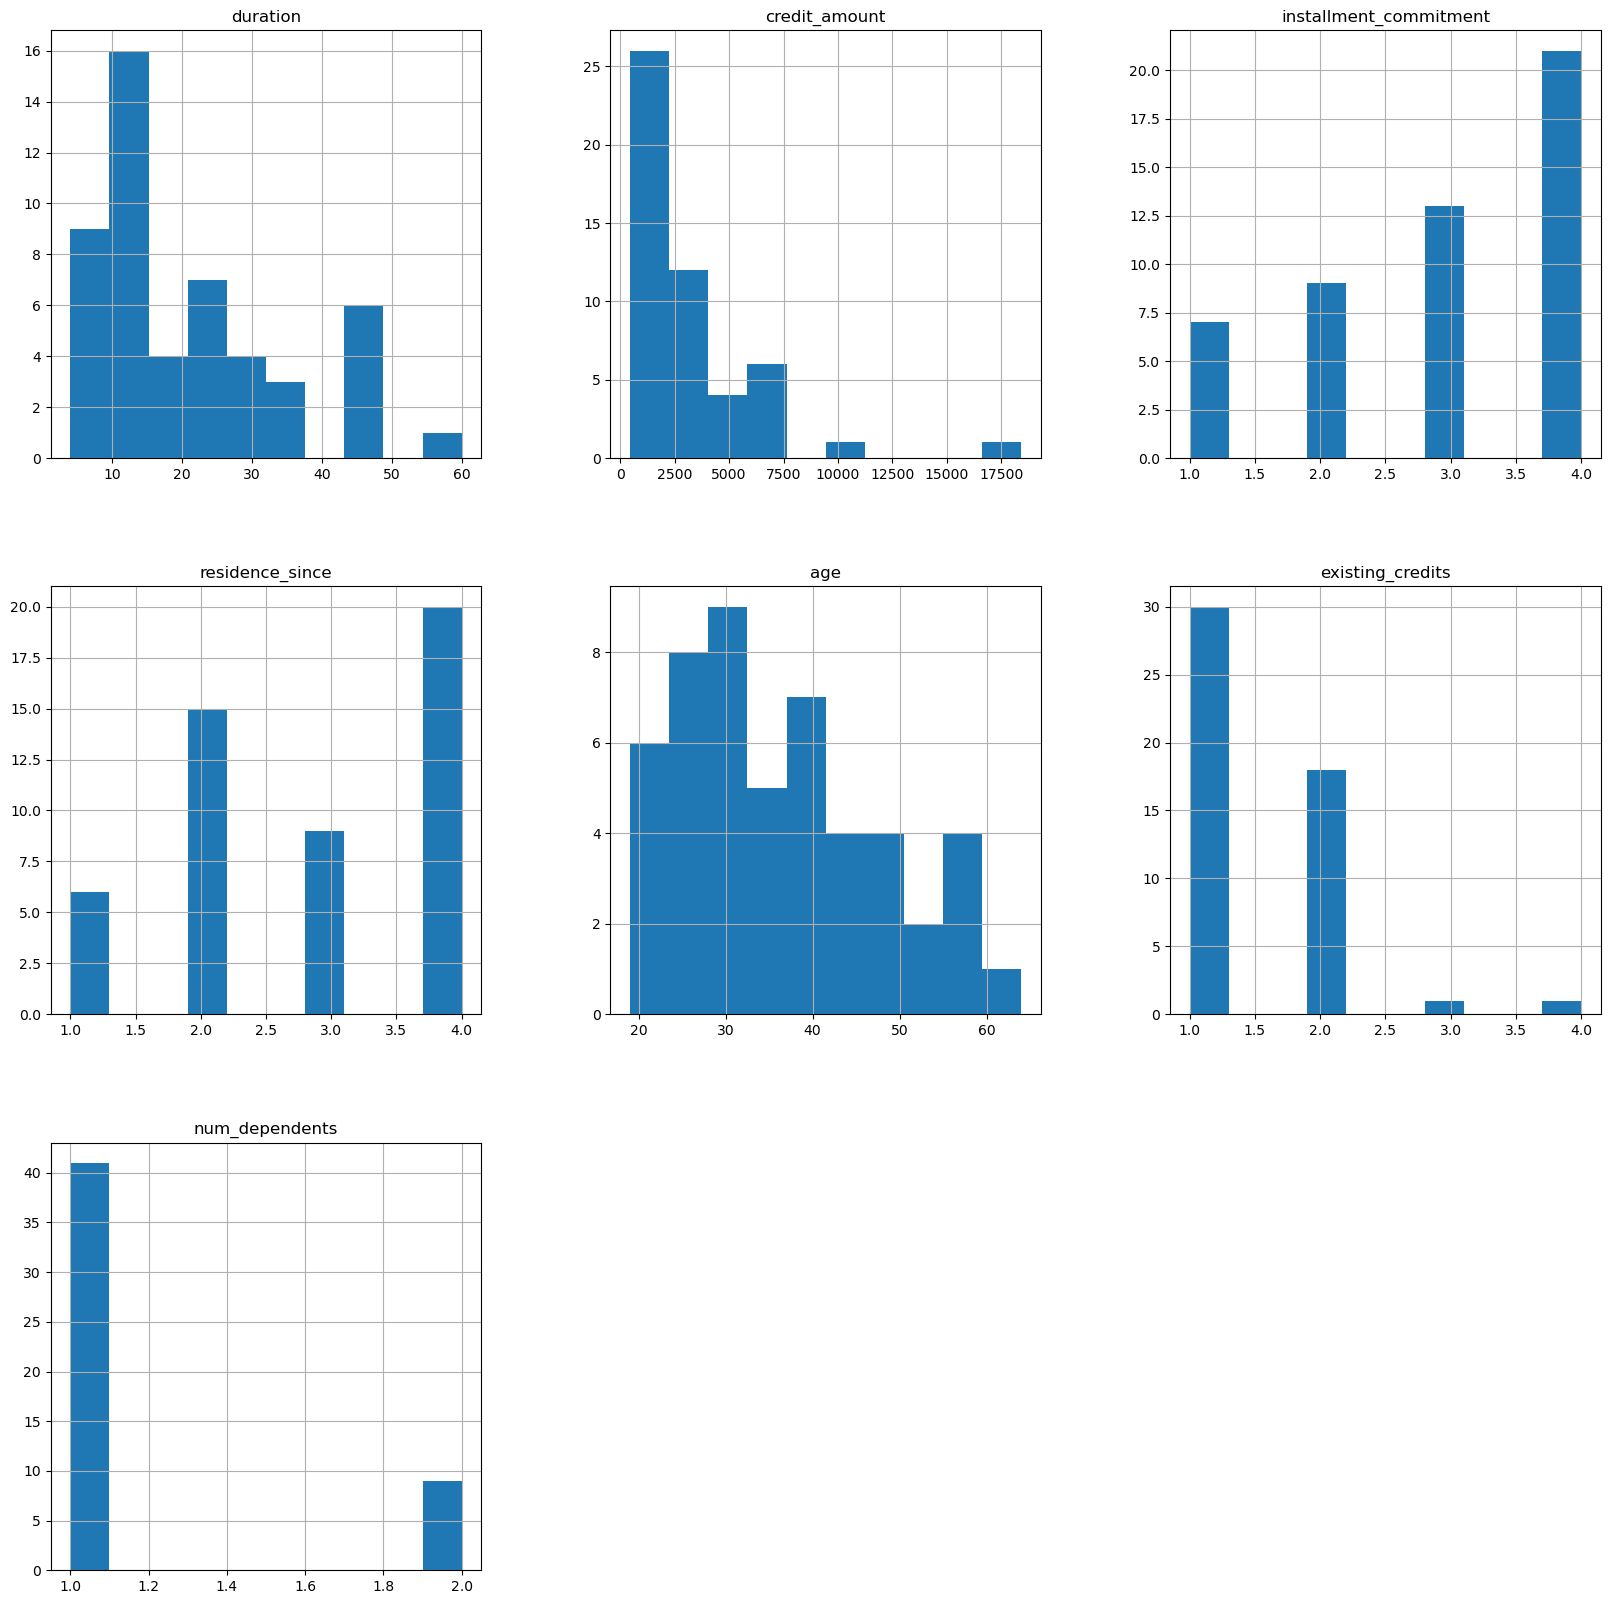

In [359]:
'''5. Para el dataset hacer un análisis gráfico documentado de las variables: Histograms, Quartiles, Scatter plots, Distributions, Boxplots, Bar plot, Heatmaps'''

hist = df.hist(figsize=(20,20))

<Axes: >

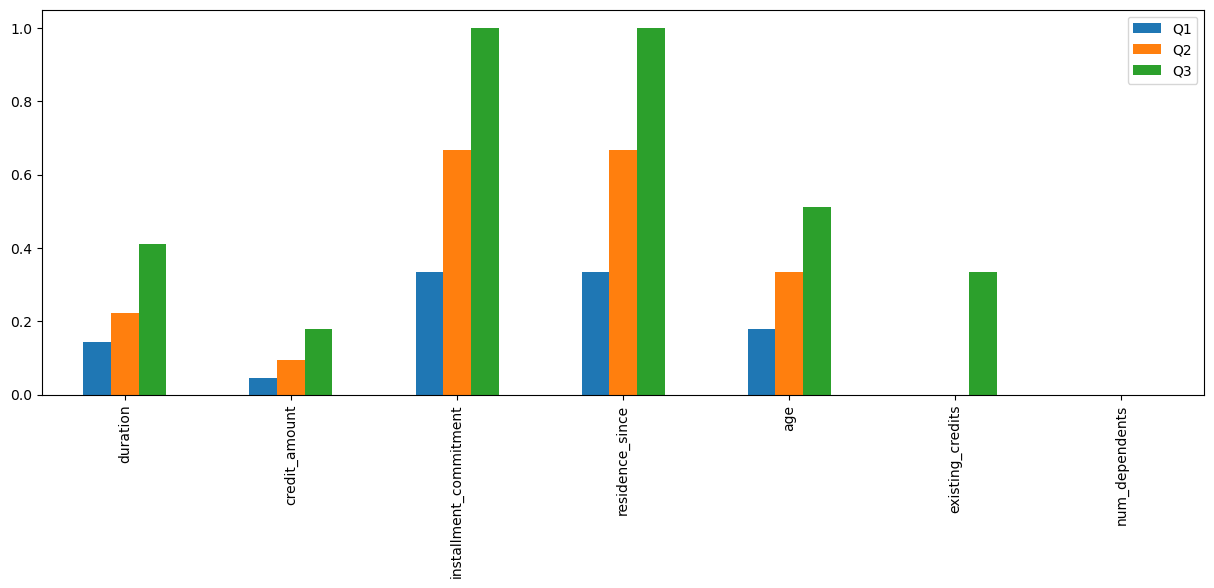

In [360]:
df_norm = (df_num - df_num.min())/(df_num.max() - df_num.min())
quartiles = df_norm.quantile([0.25,0.5,0.75])
quartiles = quartiles.T
quartiles = quartiles.rename(columns={0.25:'Q1',0.5:'Q2',0.75:'Q3'})
quartiles.plot(kind='bar',figsize=(15,5))

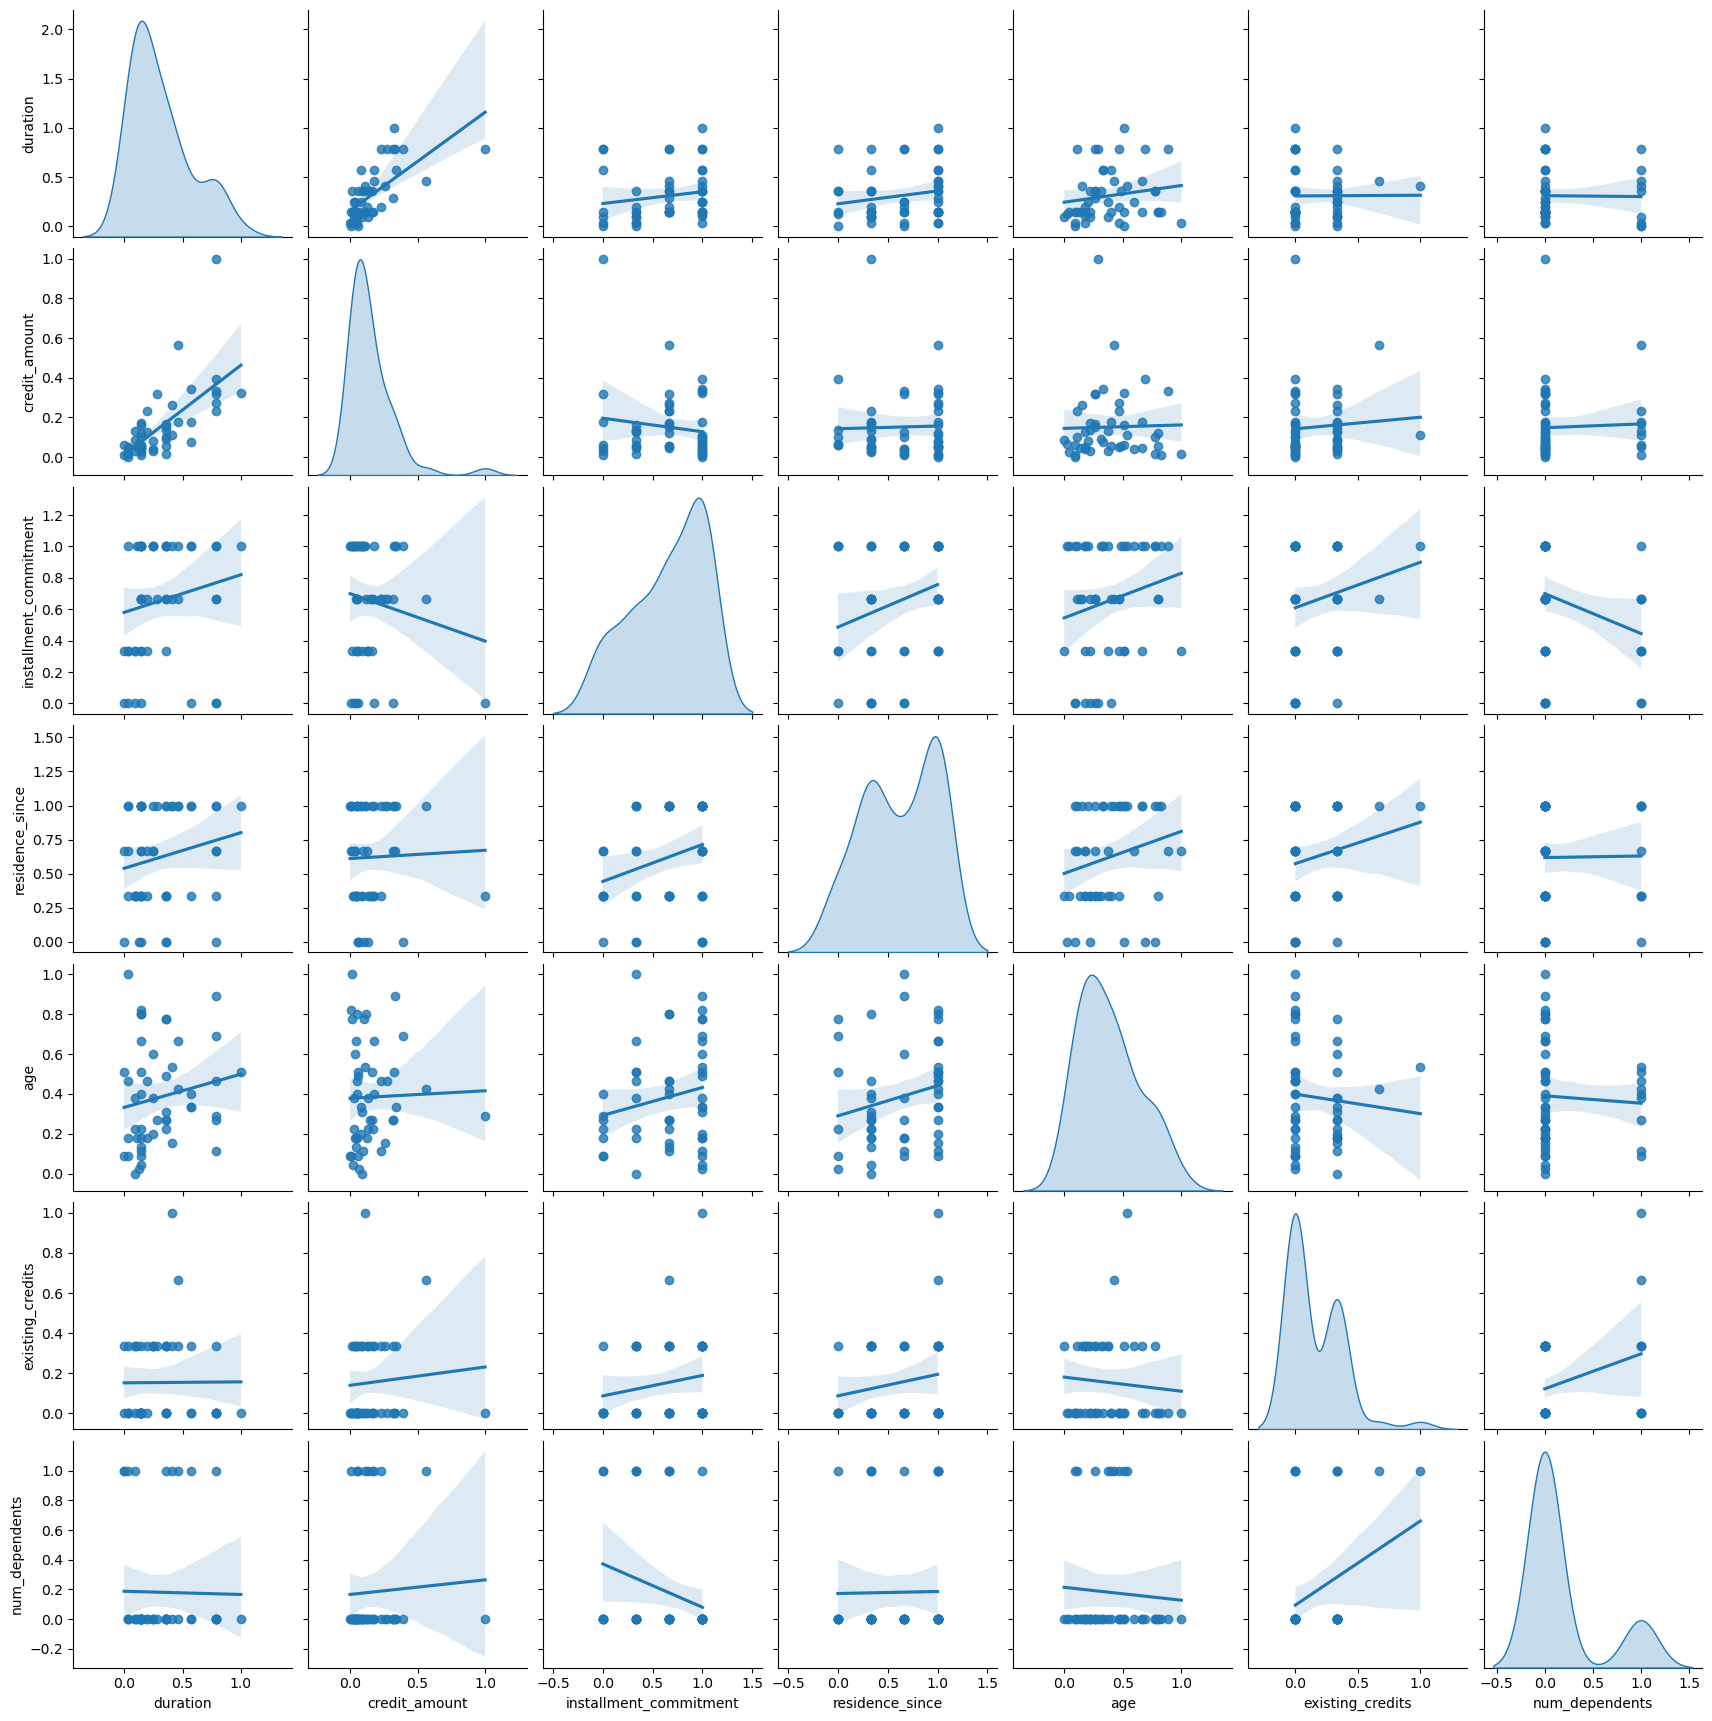

In [361]:
scatter = sb.pairplot(df_norm, kind='reg', diag_kind='kde', height=2.5)

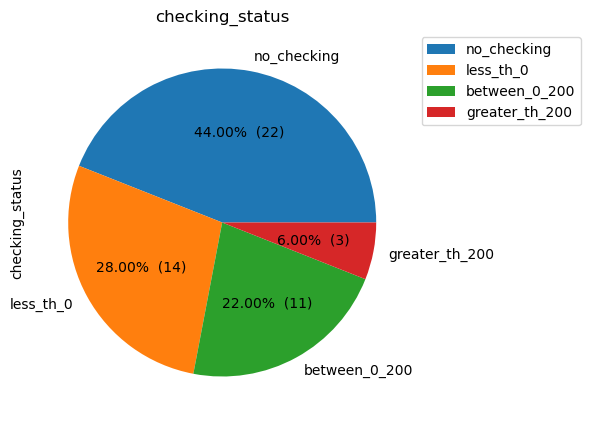

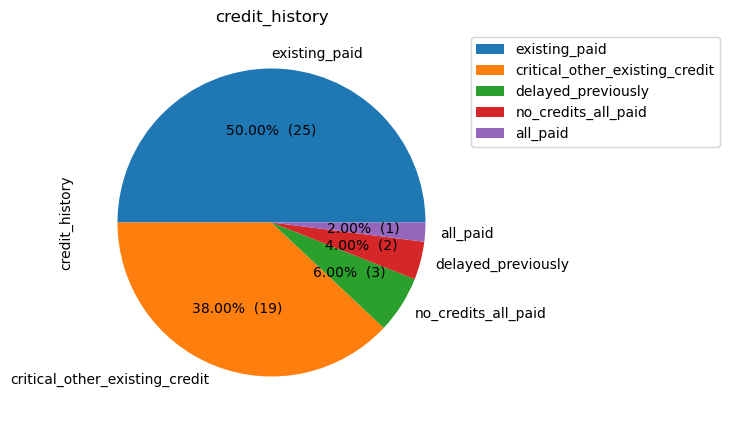

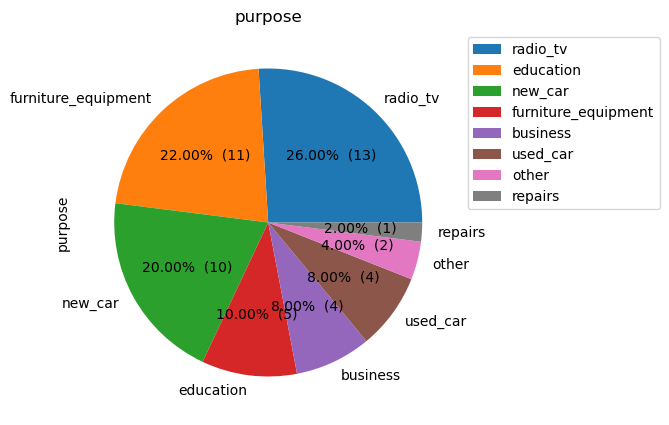

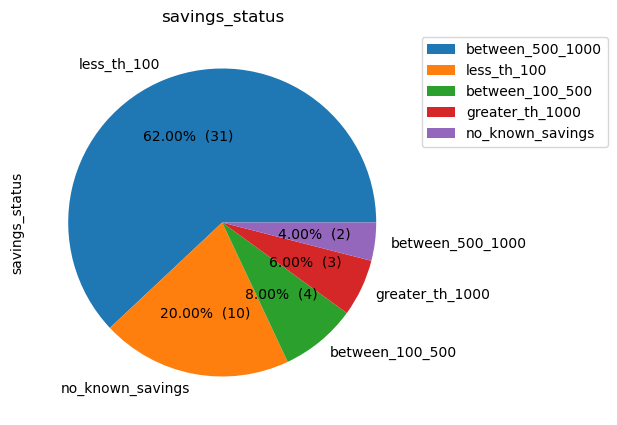

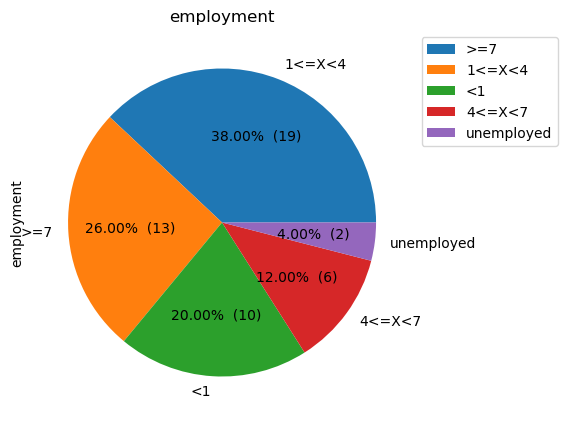

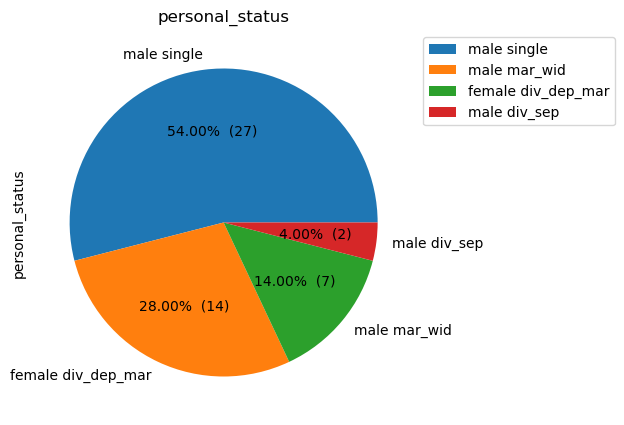

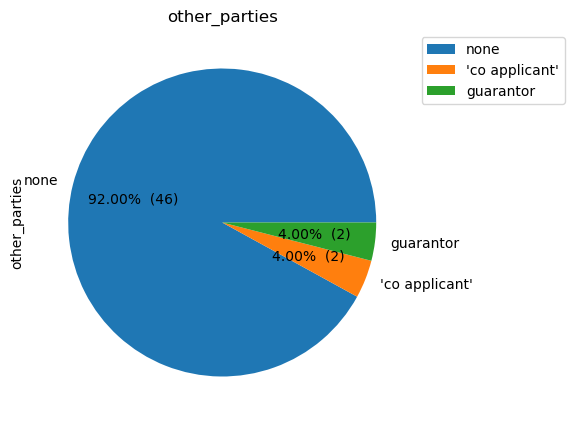

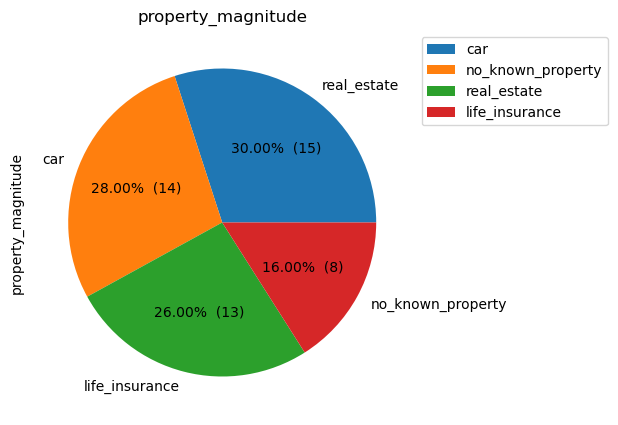

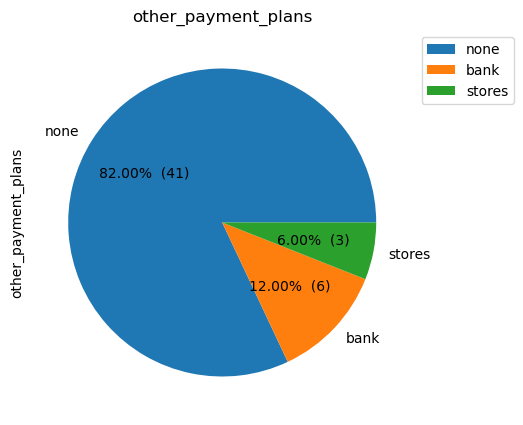

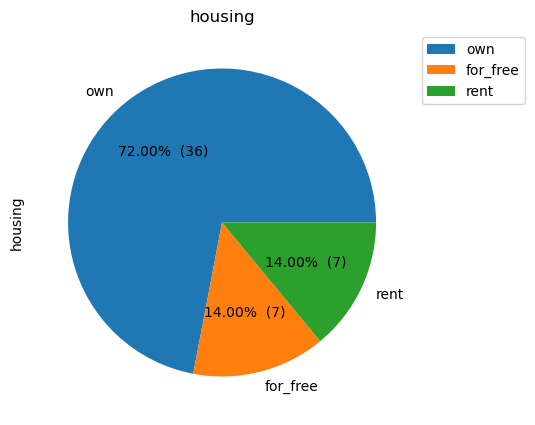

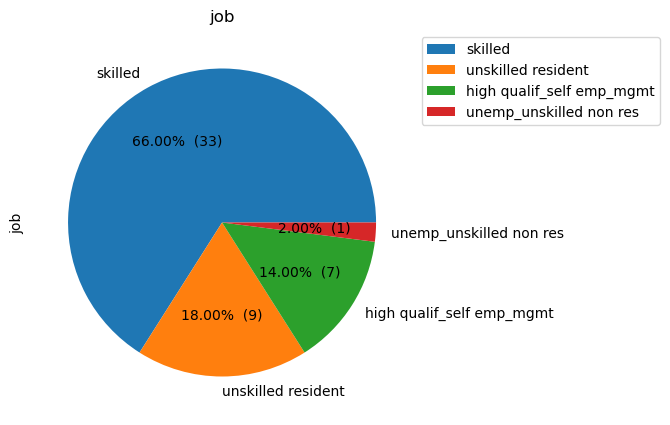

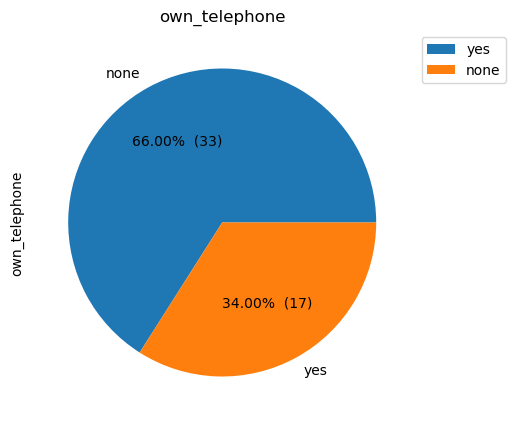

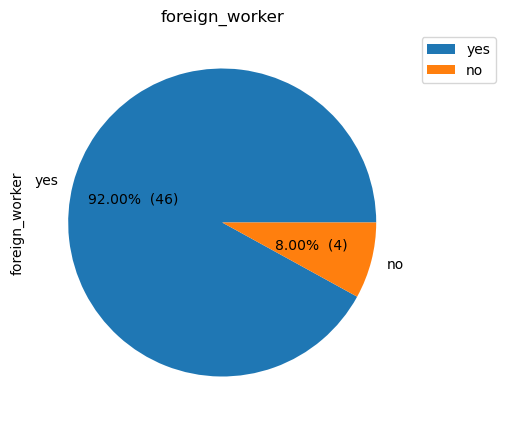

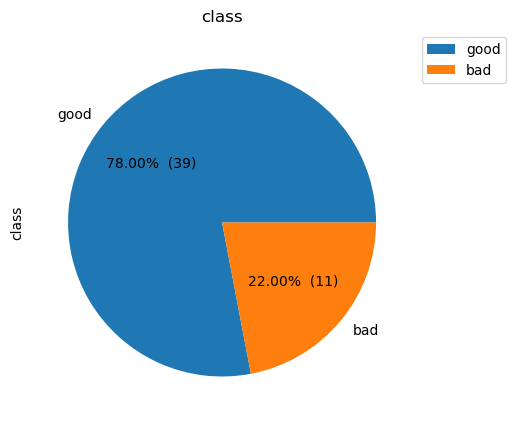

In [362]:
for i in df_obj.columns:

    def my_autopct(pct):
        total = sum(df_obj[i].value_counts())
        val = int(round(pct*total/100.0))
        return '{p:.2f}%  ({v:d})'.format(p=pct,v=val)
        #'%1.2f%%'
    
    df_obj[i].value_counts().plot(kind='pie',figsize=(15,5),autopct=lambda pct: my_autopct(pct)).legend(labels=df_obj[i].unique(), loc="upper left", bbox_to_anchor=(1, 0, 0.5, 1))
    plt.title(i)
    plt.show()

#for i in df_obj.columns:
    #df_obj[i].value_counts().plot(kind='bar',figsize=(15,5))    
    #df_obj[i].value_counts().plot(kind='pie',figsize=(15,5))
    #df_obj[i].value_counts().plot(kind='hist',figsize=(15,5))

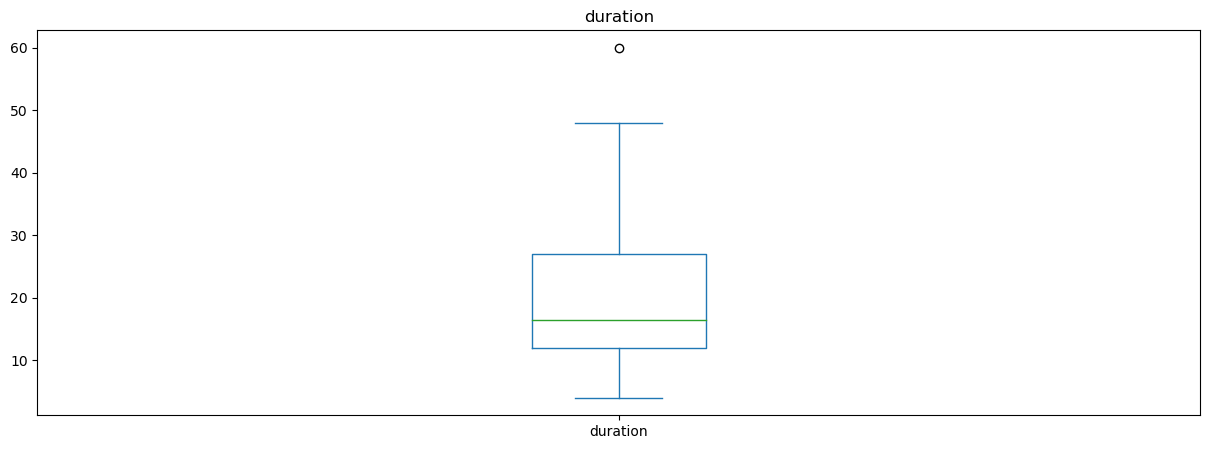

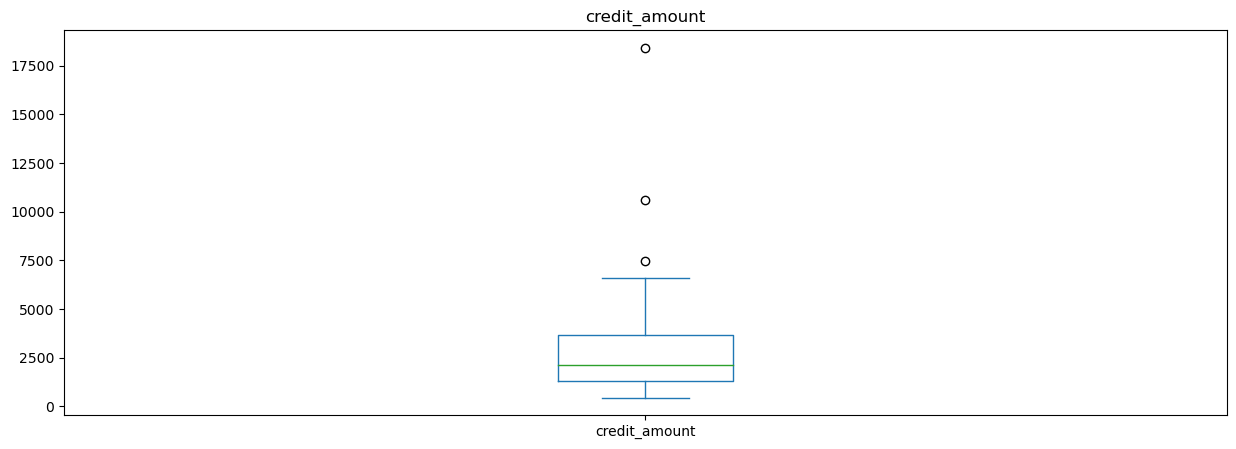

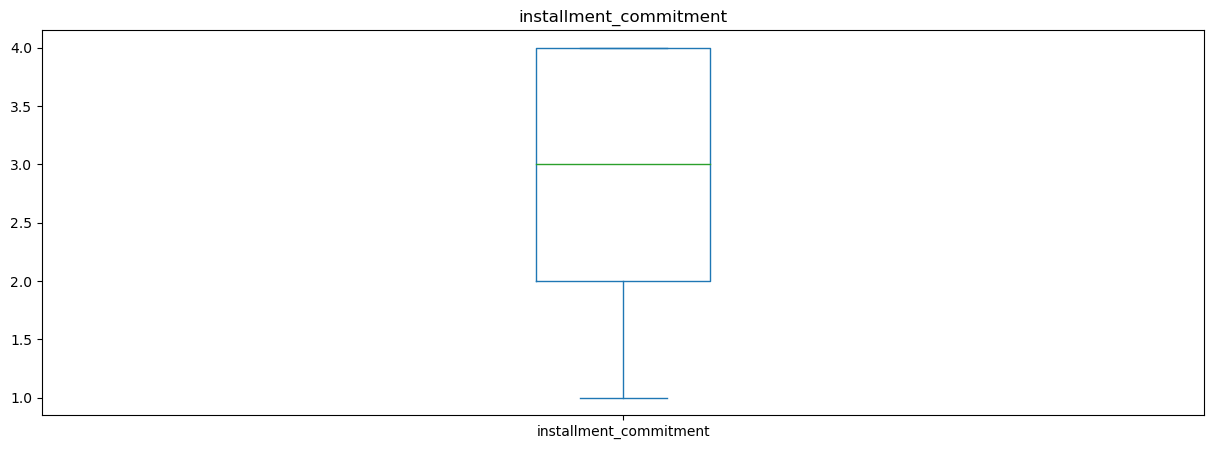

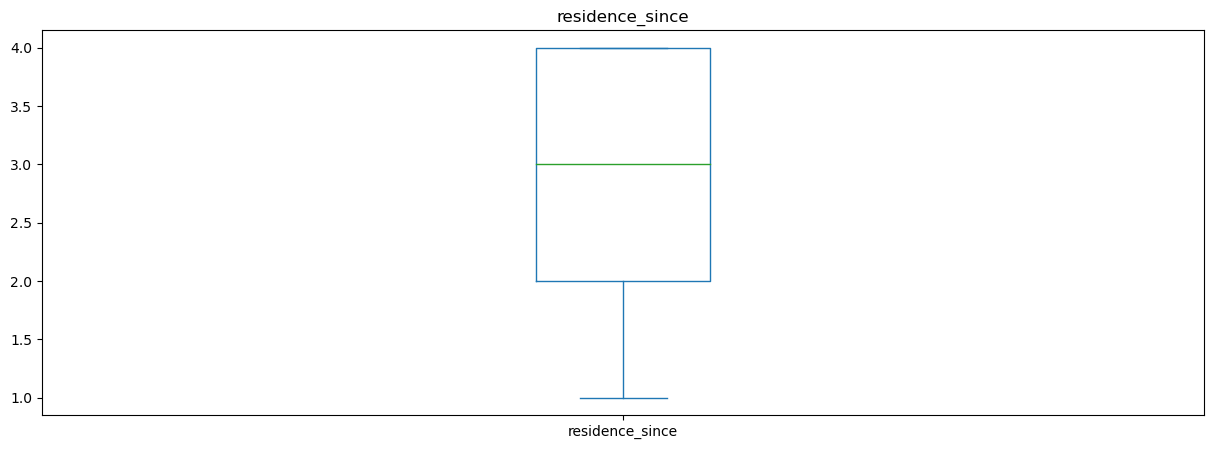

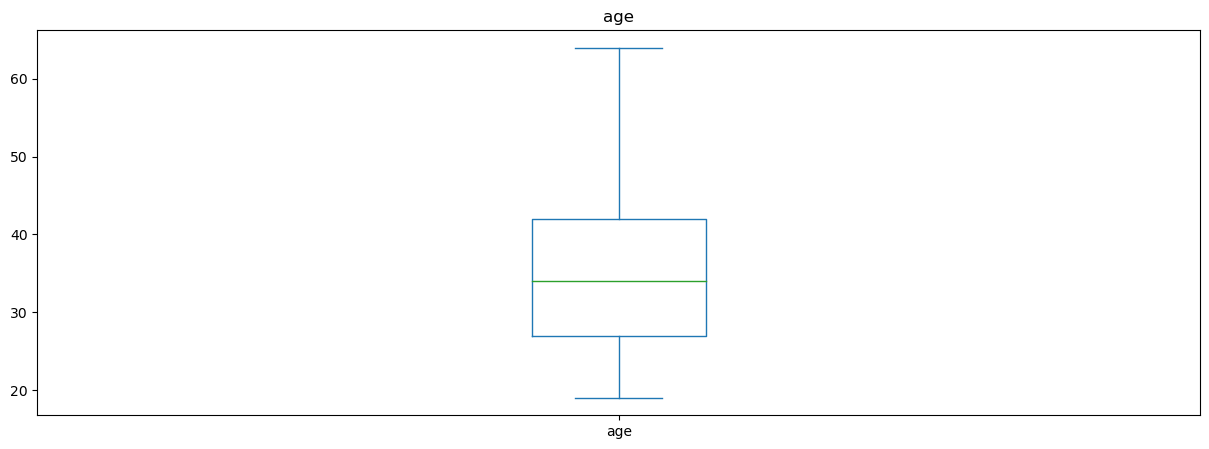

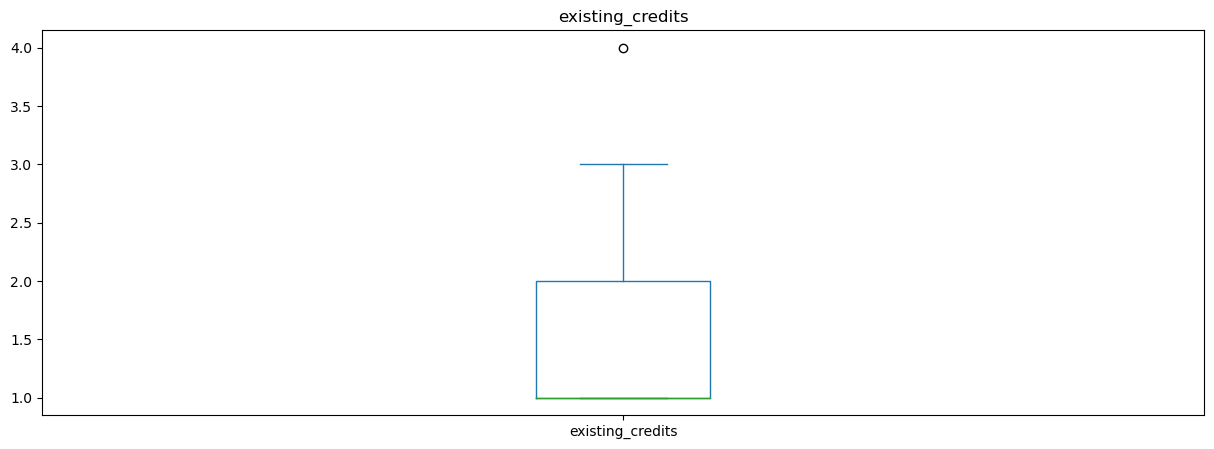

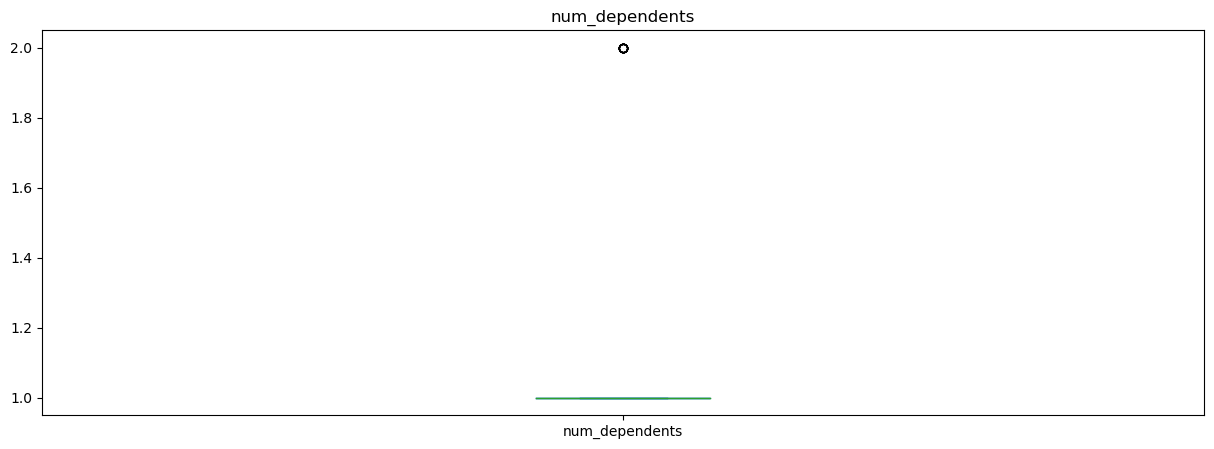

In [363]:
for i in df_num.columns:
    df_num[i].plot(kind='box',figsize=(15,5))
    plt.title(i)
    plt.show()

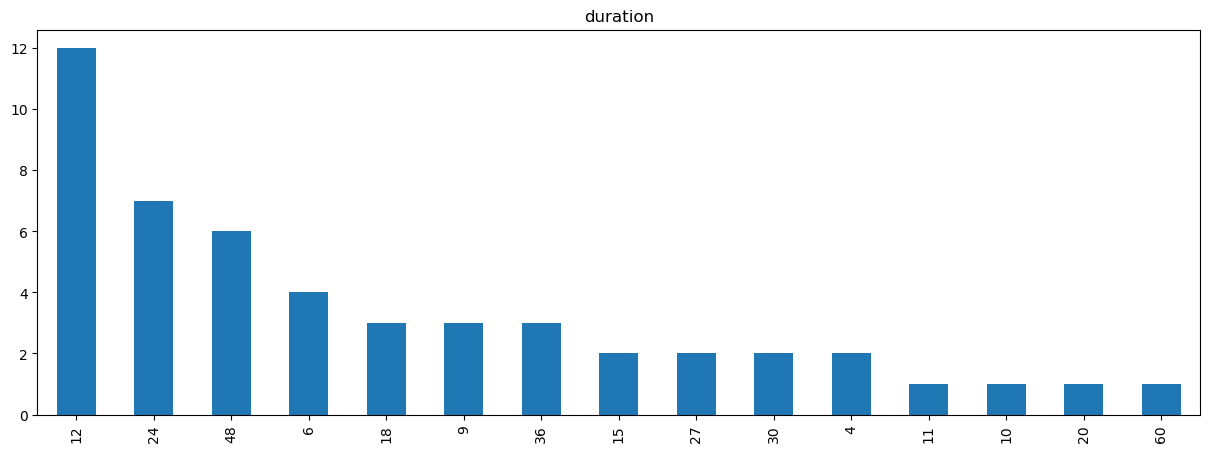

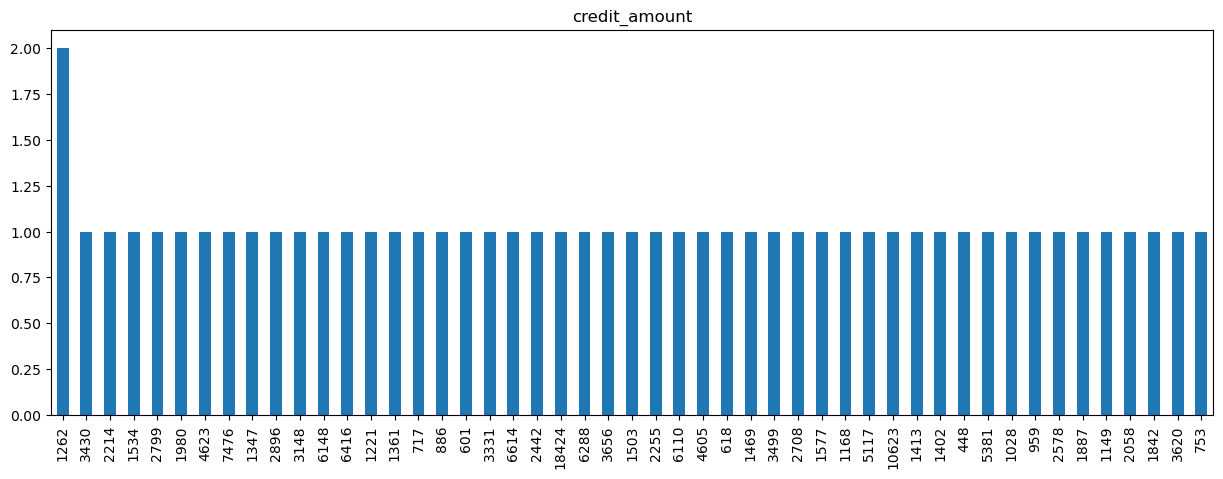

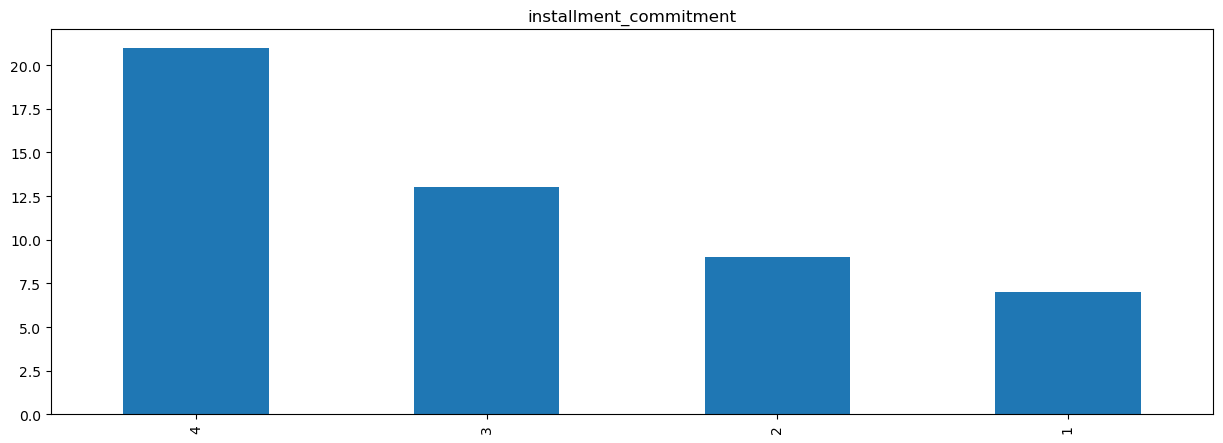

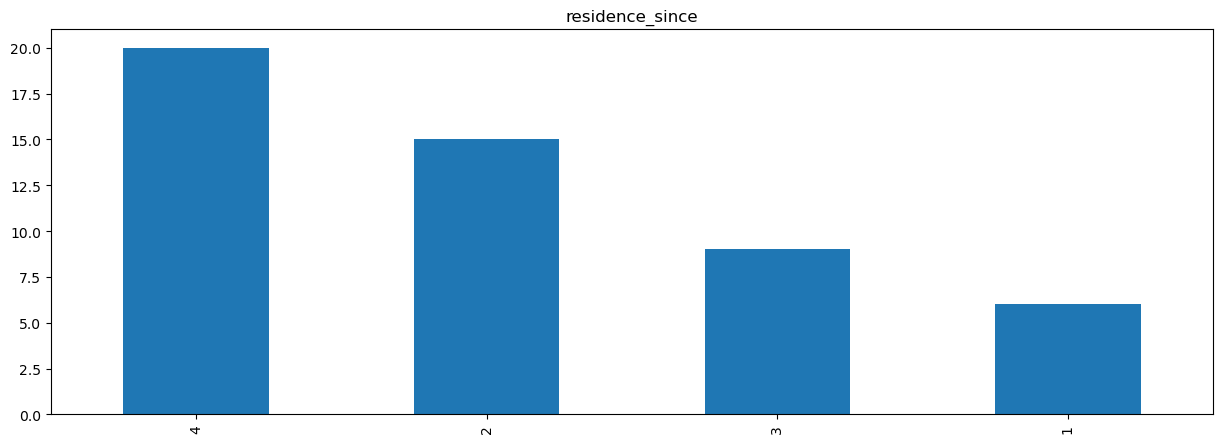

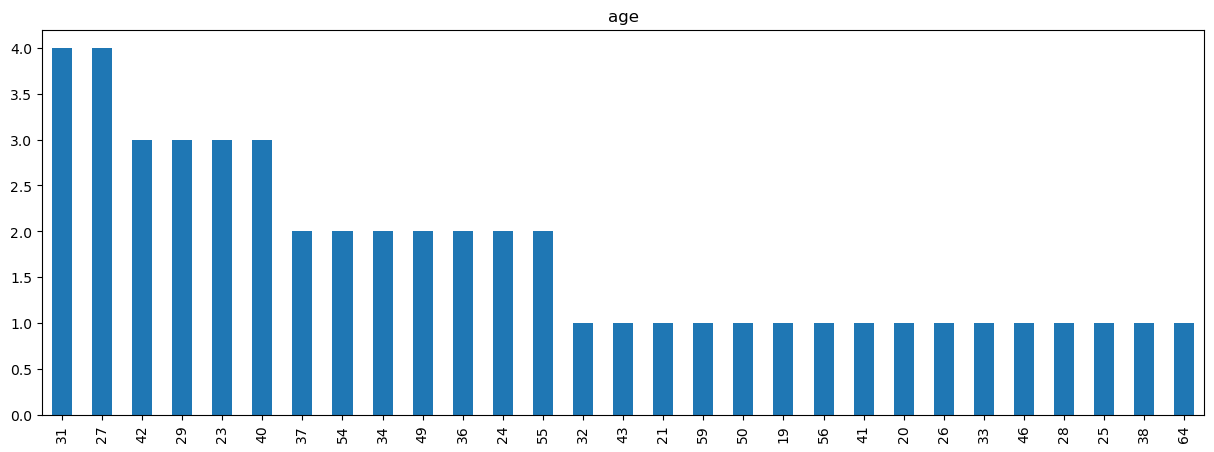

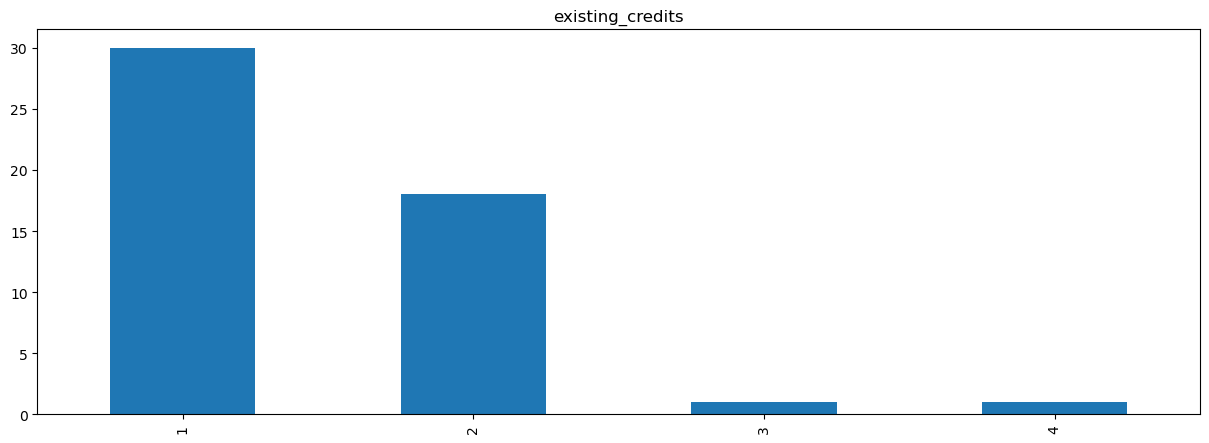

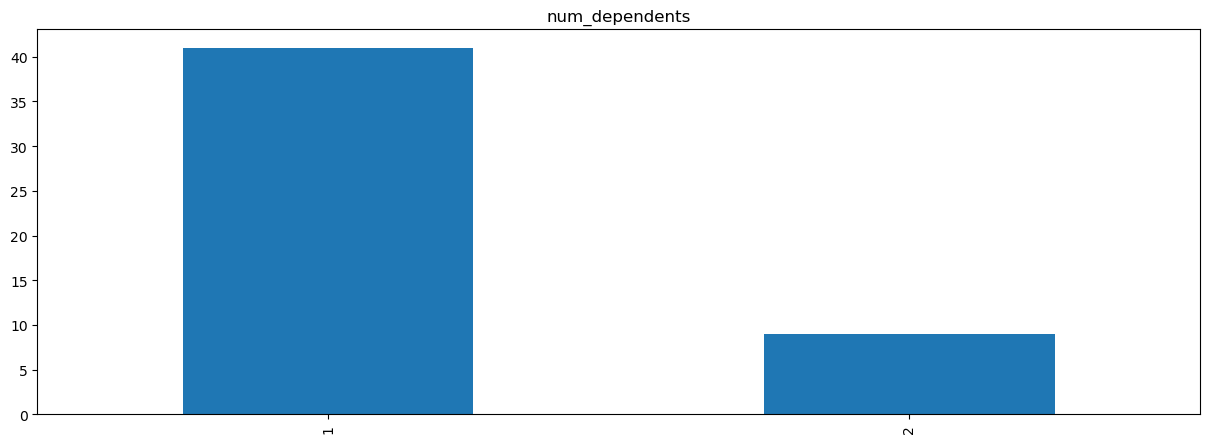

In [364]:
for i in df_num.columns:
    df_num[i].value_counts().plot(kind='bar',figsize=(15,5))
    plt.title(i)
    plt.show()

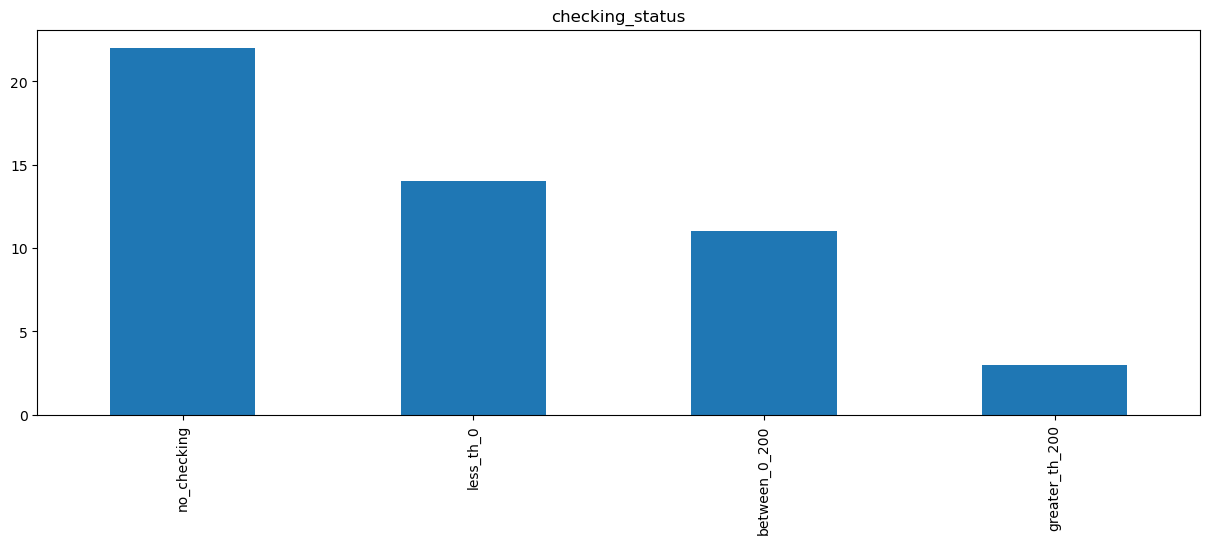

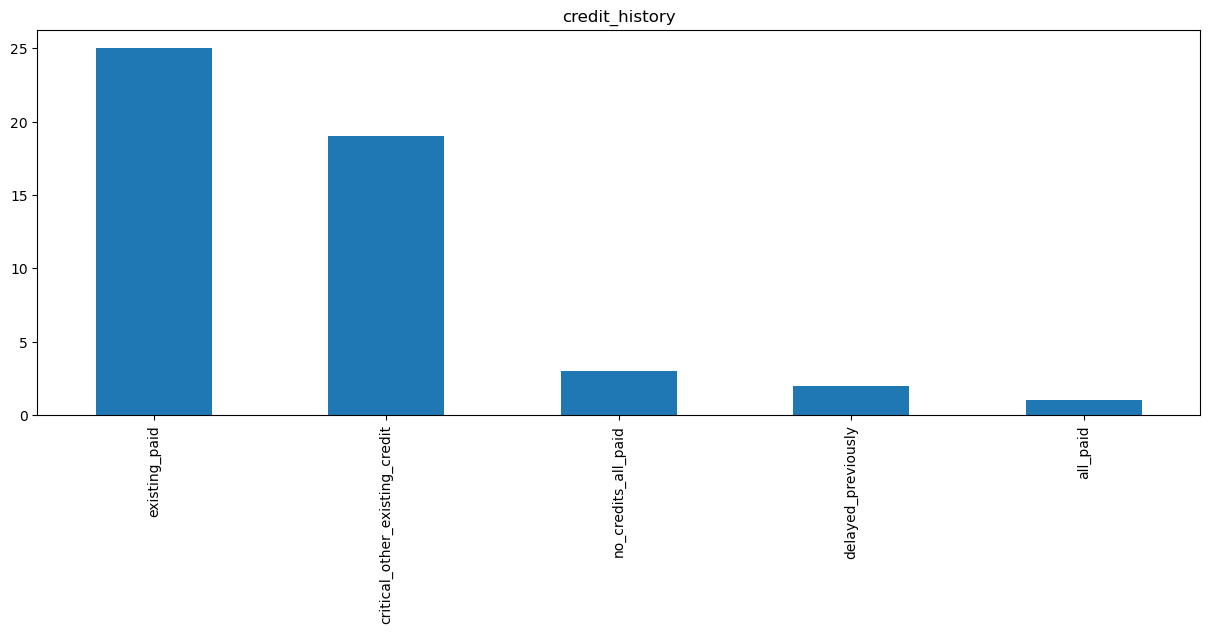

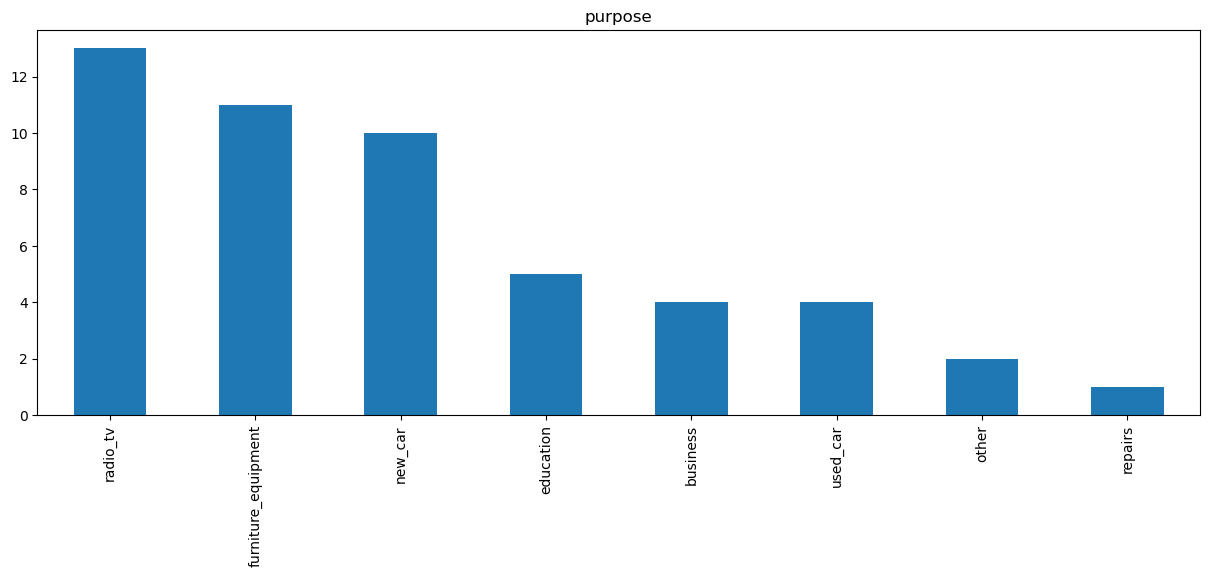

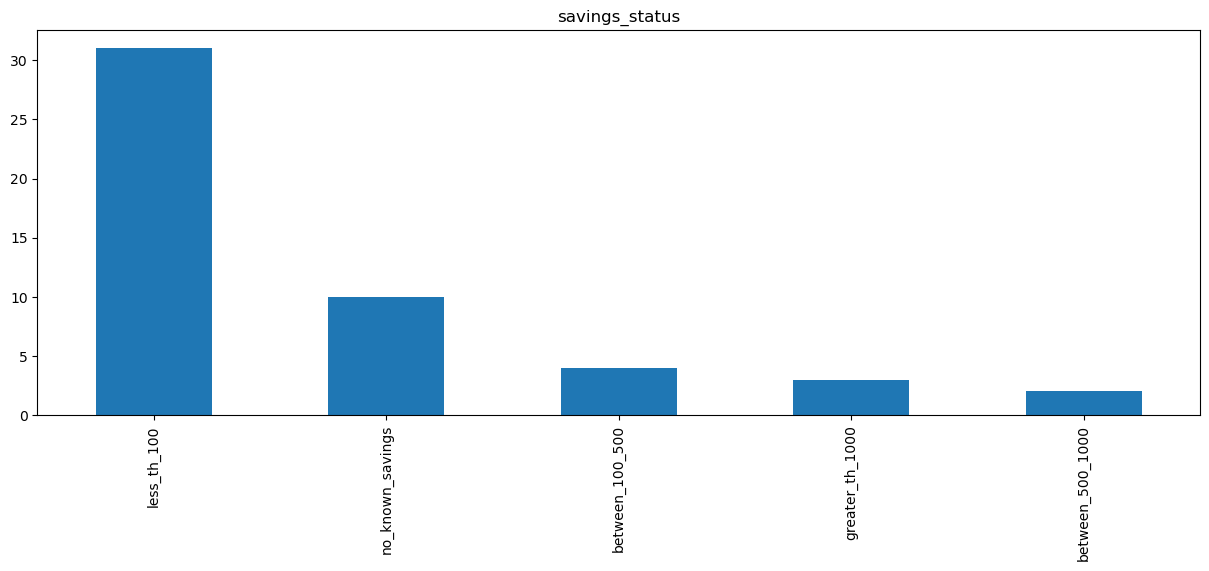

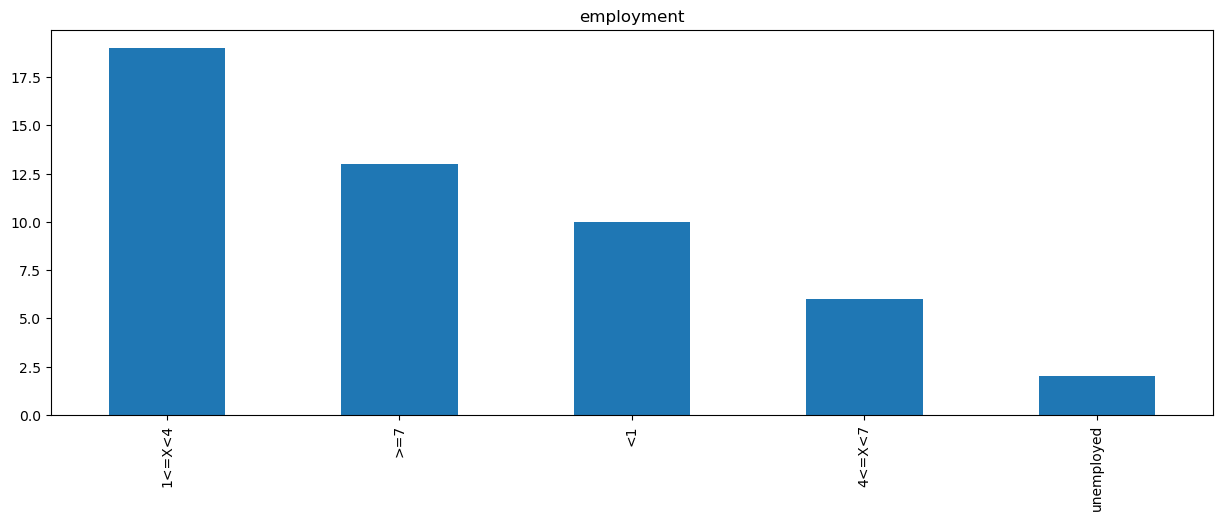

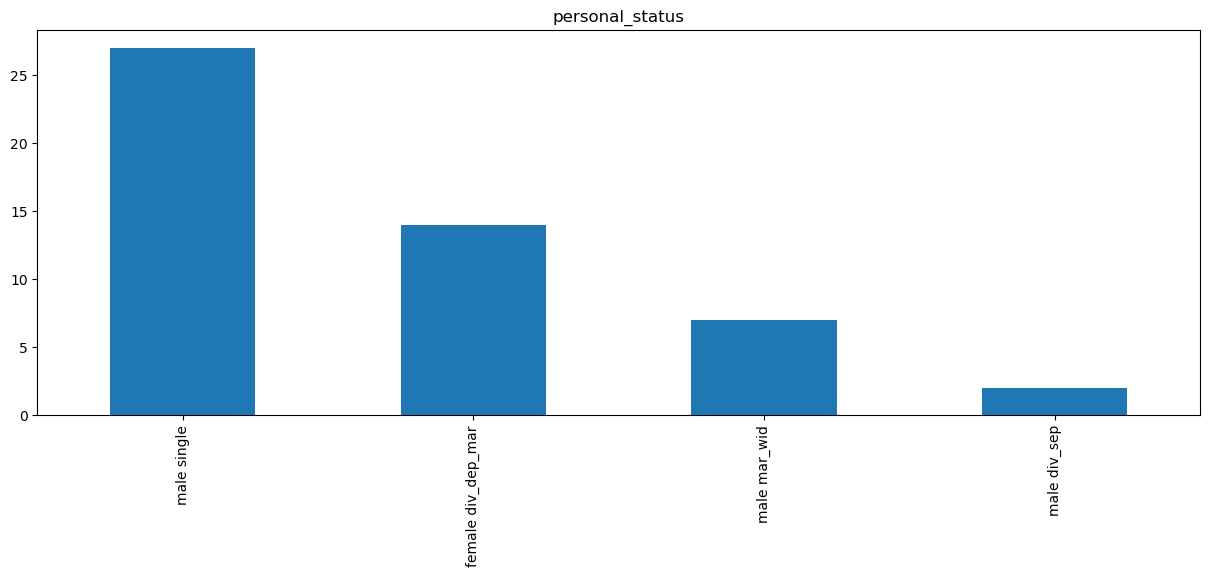

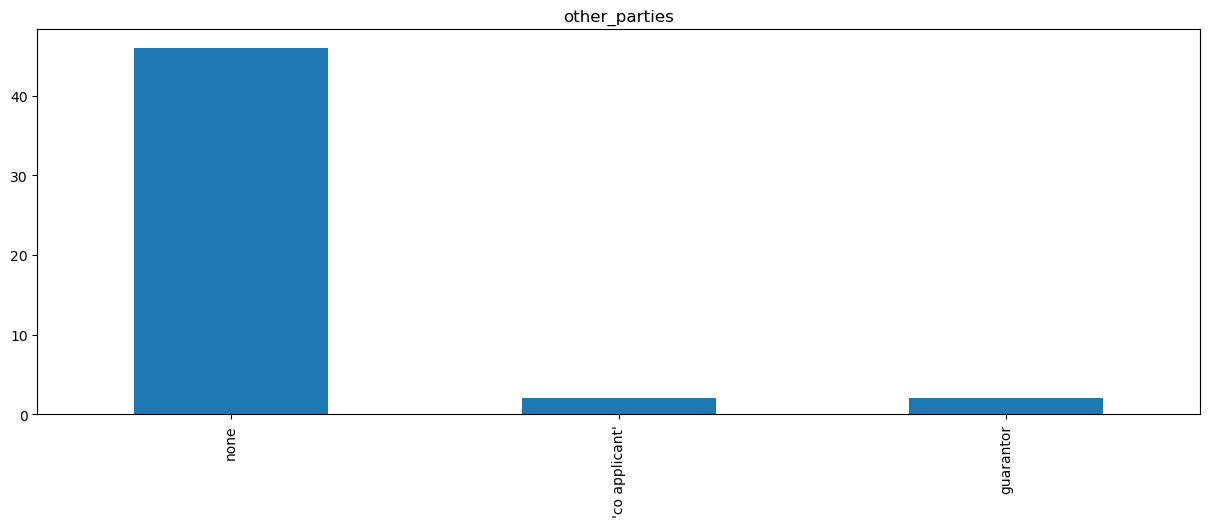

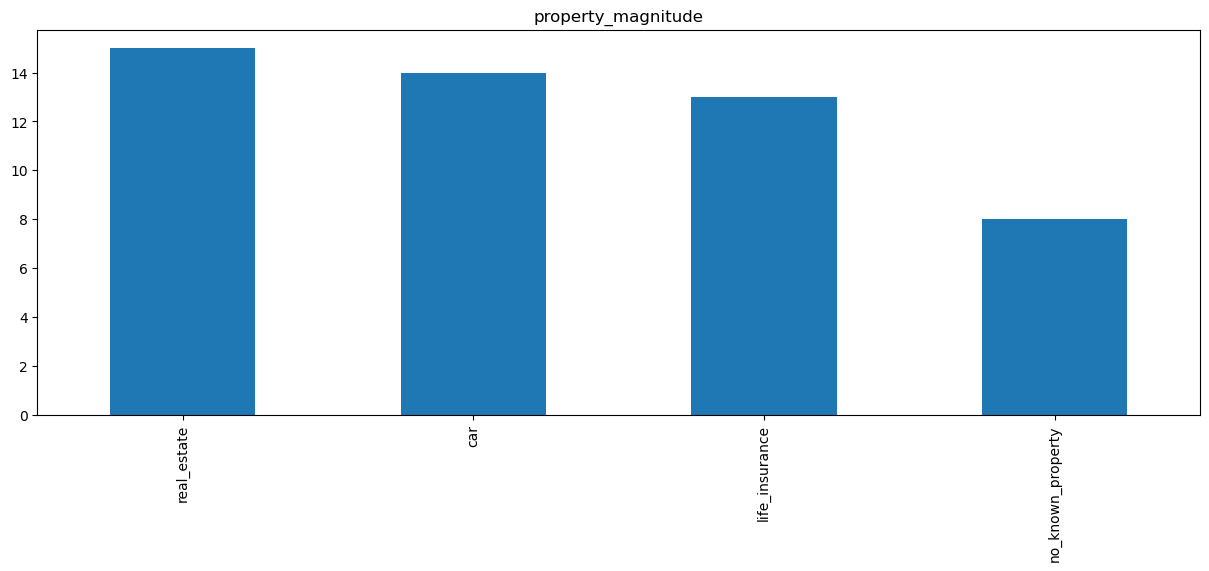

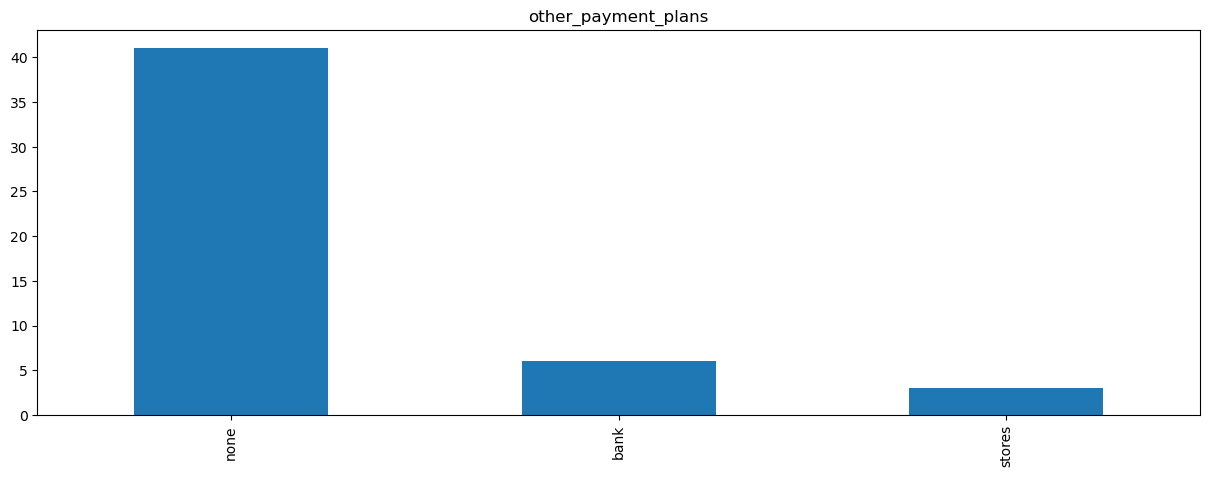

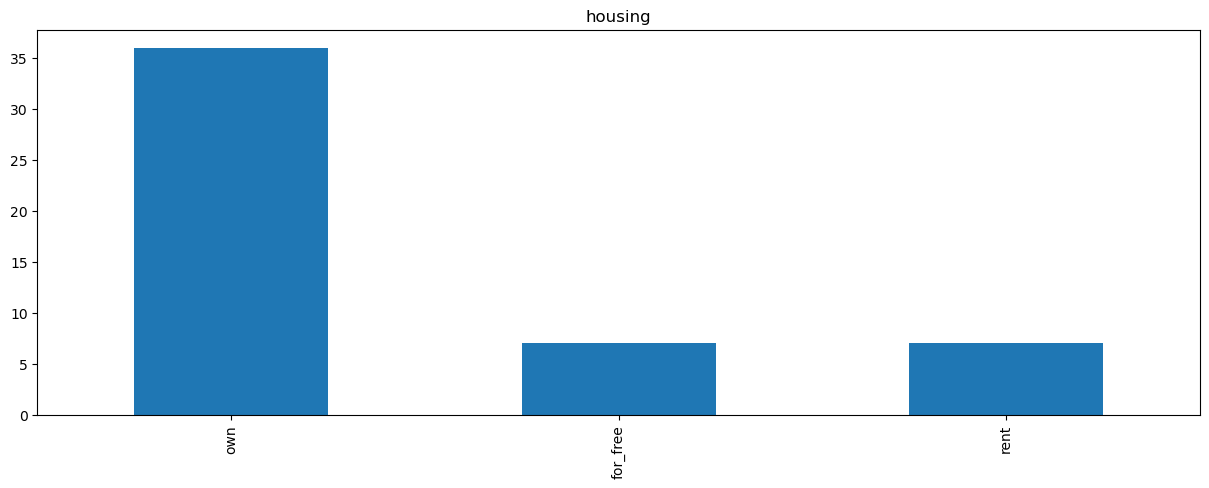

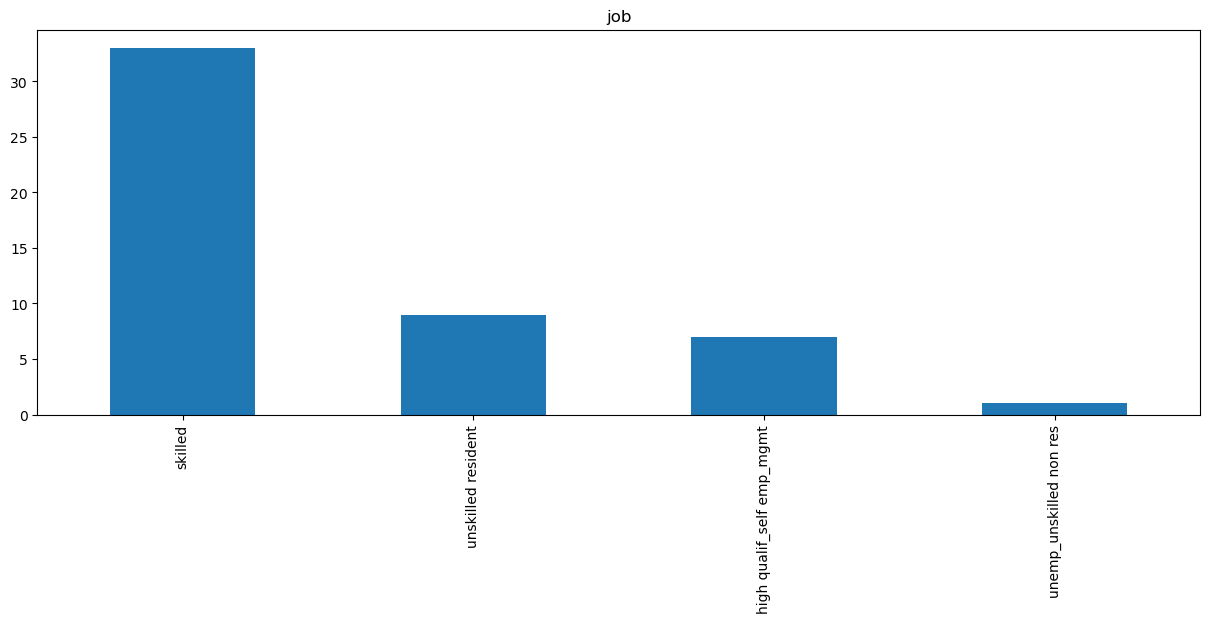

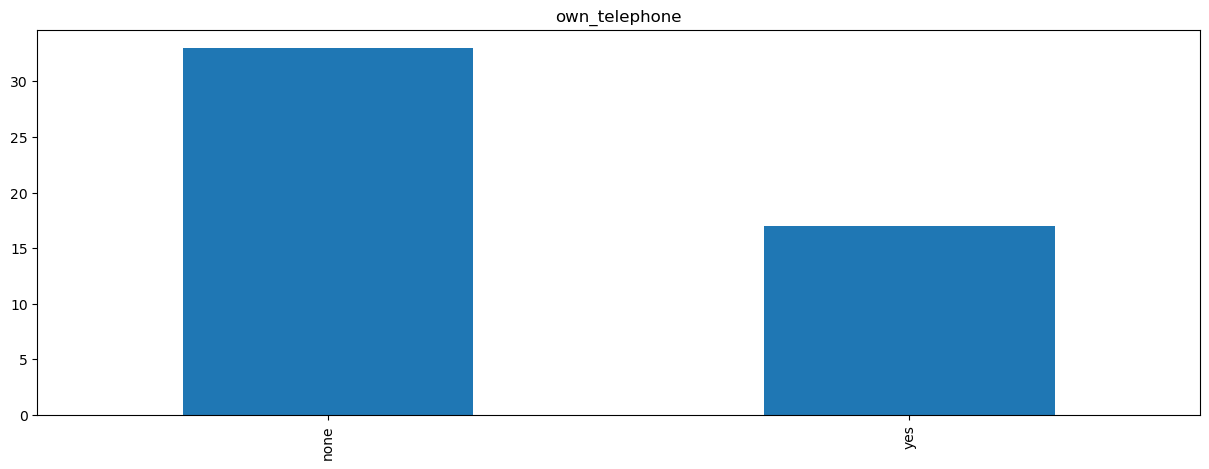

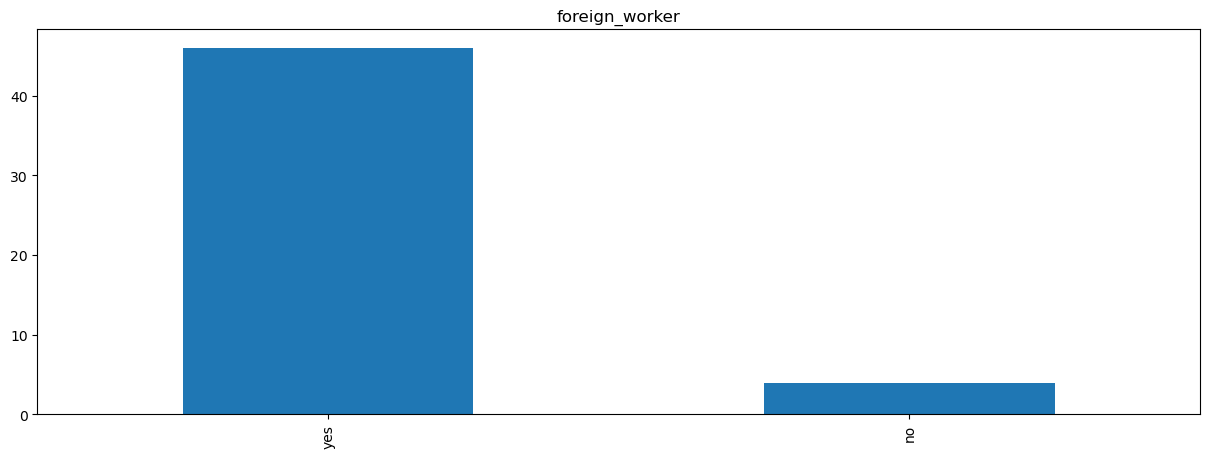

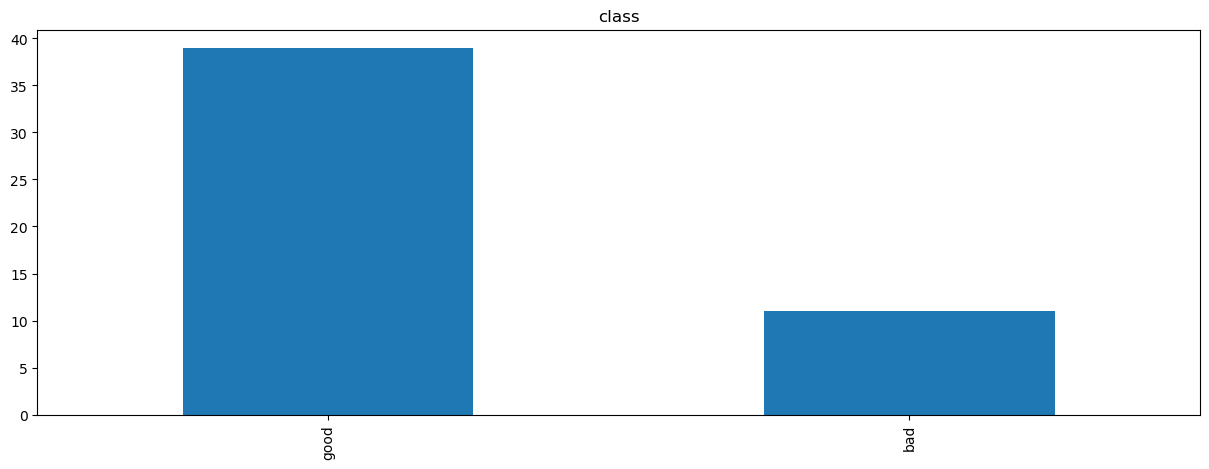

In [365]:
for i in df_obj.columns:
    df_obj[i].value_counts().plot(kind='bar',figsize=(15,5))
    plt.title(i)
    plt.show()

In [366]:
df_num.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

C:\Users\dell_\AppData\Local\Temp\ipykernel_14696\3820636135.py:2: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_num.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.00,0.67,0.17,0.18,0.17,0.01,-0.01
credit_amount,0.67,1.00,-0.14,0.03,0.03,0.07,0.04
installment_commitment,0.17,-0.14,1.00,0.27,0.20,0.17,-0.27
residence_since,0.18,0.03,0.27,1.00,0.22,0.18,0.01
age,0.17,0.03,0.20,0.22,1.00,-0.08,-0.06
existing_credits,0.01,0.07,0.17,0.18,-0.08,1.00,0.31
num_dependents,-0.01,0.04,-0.27,0.01,-0.06,0.31,1.00


<Axes: >

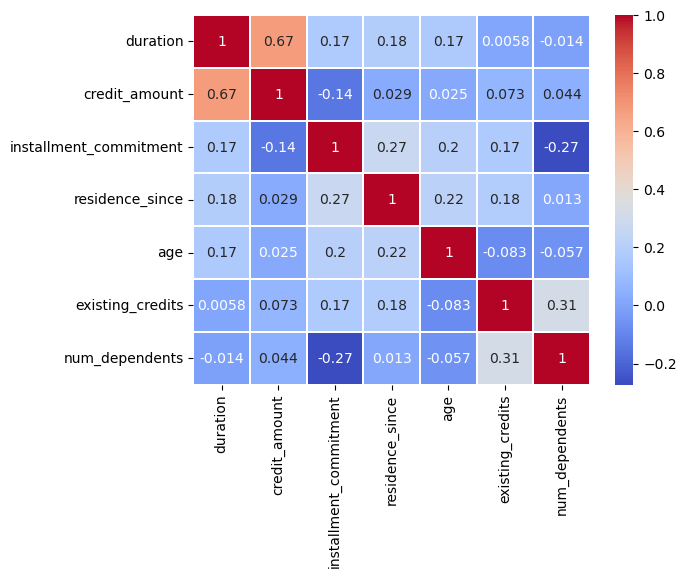

In [367]:
df_num_corr = df_num.corr()
sns.heatmap(df_num_corr, annot=True, cmap='coolwarm', linewidths=0.2)

In [368]:
'''#6. Aplicar expresión matemática para el cálculo (CreditAmount / Duración)*residence_since'''

for i in df.index:
    df.loc[i,'CreditAmount/Duration*residence_since'] = (df.loc[i,'credit_amount']/df.loc[i,'duration'])*df.loc[i,'residence_since']
df['tasa_interes'] = df['CreditAmount/Duration*residence_since']
df.drop(columns='CreditAmount/Duration*residence_since',inplace=True)
df['tasa_interes'].head(10)

0    285.833333
1    381.875000
2    210.333333
3    206.000000
4    244.833333
5    583.166667
6    541.600000
7    143.363636
8    292.000000
9    758.074074
Name: tasa_interes, dtype: float64

In [369]:
'''#7. Discretizar duración, credit_amount, age, number_of_dependents.'''

df['duration_discretized'] = df['duration']
for i in df.index:
    if  df['duration_discretized'].loc[i] <= 20:
        df['duration_discretized'].loc[i] = 0
    elif df['duration_discretized'].loc[i] <= 40:
        df['duration_discretized'].loc[i] = 1
    elif df['duration_discretized'].loc[i] <= 60:
        df['duration_discretized'].loc[i] = 2
    else:
        df['duration_discretized'].loc[i] = 3



C:\Users\dell_\AppData\Local\Temp\ipykernel_14696\489902055.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_discretized'].loc[i] = 1
C:\Users\dell_\AppData\Local\Temp\ipykernel_14696\489902055.py:10: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_discretized'].loc[i] = 2
C:\Users\dell_\AppData\Local\Temp\ipykernel_14696\489902055.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df['duration_discretized']

In [370]:
print(df['duration'].describe().loc[['min','max']], df['duration'].value_counts(), sep='\n')
print(df['duration_discretized'].unique(), df['duration_discretized'].value_counts(), sep='\n')

min     4.0
max    60.0
Name: duration, dtype: float64
12    12
24     7
48     6
6      4
18     3
9      3
36     3
15     2
27     2
30     2
4      2
11     1
10     1
20     1
60     1
Name: duration, dtype: int64
[1 2 0]
0    29
1    14
2     7
Name: duration_discretized, dtype: int64


In [371]:
'''#7. pero con el uso de una función que remapee los valores de cualquier columna'''

df['discrt_duration'] = df['duration']
print(df['discrt_duration'].describe().loc[['min','max']])

def remapear_columna(columna):
    segmentos = pd.cut(columna, bins=[0, 20, 40, float('inf')], labels=['corto', 'mediano', 'largo'], right=False)
    return segmentos

segmentos = remapear_columna(df['discrt_duration'])
df = pd.concat([df, segmentos.rename('discrt_duration_segmentado')], axis=1)
df = df.drop(columns=['discrt_duration'])
df.head(5)


min     4.0
max    60.0
Name: discrt_duration, dtype: float64


,checking_status,duration,credit_history,purpose,credit_amount,savings_status,employment,installment_commitment,personal_status,other_parties,...,housing,existing_credits,job,num_dependents,own_telephone,foreign_worker,class,tasa_interes,duration_discretized,discrt_duration_segmentado
0,no_checking,24,existing_paid,radio_tv,3430,between_500_1000,>=7,3,male single,none,...,own,1,skilled,2,yes,yes,good,285.833333,1,mediano
1,no_checking,48,critical_other_existing_credit,education,6110,less_th_100,1<=X<4,1,male single,none,...,for_free,1,skilled,1,yes,yes,good,381.875000,2,largo
2,no_checking,12,existing_paid,radio_tv,1262,less_th_100,1<=X<4,3,male single,none,...,own,1,skilled,1,none,yes,good,210.333333,0,corto
3,no_checking,12,critical_other_existing_credit,radio_tv,618,less_th_100,>=7,4,male single,none,...,own,1,skilled,1,none,yes,good,206.000000,0,corto
4,no_checking,24,existing_paid,new_car,1469,between_100_500,>=7,4,male mar_wid,none,...,rent,1,unskilled resident,1,none,yes,good,244.833333,1,mediano


In [372]:
#para mayor claridad se movera la columna duration a una posicion mas atras

def mover_columna(df, nombre_columna, posicion):
    columna = df.pop(nombre_columna)
    df.insert(posicion, nombre_columna, columna)
    return df

df = mover_columna(df, 'duration', 21)
print(df.iloc[:, -3:])

    duration  duration_discretized discrt_duration_segmentado
0         24                     1                    mediano
1         48                     2                      largo
2         12                     0                      corto
3         12                     0                      corto
4         24                     1                    mediano
5         12                     0                      corto
6         15                     0                      corto
7         11                     0                      corto
8         12                     0                      corto
9         27                     1                    mediano
10        30                     1                    mediano
11        12                     0                      corto
12        48                     2                      largo
13        12                     0                      corto
14        12                     0                      corto
15      

In [386]:
'''#8. Obtenga la matriz de correlación de las variables numéricas.'''

df_num.corr()

,duration,credit_amount,installment_commitment,residence_since,age,existing_credits,num_dependents
duration,1.000000,0.672019,0.169793,0.184827,0.168262,0.005823,-0.014236
credit_amount,0.672019,1.000000,-0.143575,0.028714,0.025455,0.073034,0.043715
installment_commitment,0.169793,-0.143575,1.000000,0.271175,0.199536,0.172139,-0.272795
residence_since,0.184827,0.028714,0.271175,1.000000,0.216262,0.180706,0.012565
age,0.168262,0.025455,0.199536,0.216262,1.000000,-0.082907,-0.056764
existing_credits,0.005823,0.073034,0.172139,0.180706,-0.082907,1.000000,0.314435
num_dependents,-0.014236,0.043715,-0.272795,0.012565,-0.056764,0.314435,1.000000


In [374]:
'''#9. Obtenga la tabla de relación de frecuencias entre los atributos job y purpose.'''

print(pd.crosstab(df['job'], df['purpose']))

purpose                    business  education  furniture_equipment  new_car  \
job                                                                            
high qualif_self emp_mgmt         1          2                    1        1   
skilled                           3          3                    7        6   
unemp_unskilled non res           0          0                    0        0   
unskilled resident                0          0                    3        3   

purpose                    other  radio_tv  repairs  used_car  
job                                                            
high qualif_self emp_mgmt      1         0        0         1  
skilled                        0        10        1         3  
unemp_unskilled non res        1         0        0         0  
unskilled resident             0         3        0         0  


In [375]:
'''#10. Mapear a valores diferentes para atributos own_telephone, foreign_worker.'''

print("Valores unicos de 'own_telephone': ",df['own_telephone'].unique(),sep='\n')
print("Valores unicos de 'foreign_worker': ",df['foreign_worker'].unique(),sep='\n')
df['own_telephone'] = df['own_telephone'].replace({'yes': 1, 'none': 0})
df['foreign_worker'] = df['foreign_worker'].replace({'yes': 1, 'no': 0})
print("Valores unicos de 'own_telephone': ",df['own_telephone'].unique(),sep='\n')
print("Valores unicos de 'foreign_worker': ",df['foreign_worker'].unique(),sep='\n')


Valores unicos de 'own_telephone': 
['yes' 'none']
Valores unicos de 'foreign_worker': 
['yes' 'no']
Valores unicos de 'own_telephone': 
[1 0]
Valores unicos de 'foreign_worker': 
[1 0]


In [376]:
'''#11. Normalizar el campo instalment_commitment'''

df['installment_commitment_norm'] = df['installment_commitment']
print("valores antes de la normalizacion:",df['installment_commitment_norm'].describe().loc[['min','max']],sep='\n')
df['installment_commitment_norm'] = (df['installment_commitment_norm'] - df['installment_commitment_norm'].min()) / (df['installment_commitment_norm'].max() - df['installment_commitment_norm'].min())
print("valores despues de la normalizacion:",df['installment_commitment_norm'].describe().loc[['min','max']], sep='\n')

valores antes de la normalizacion:
min    1.0
max    4.0
Name: installment_commitment_norm, dtype: float64
valores despues de la normalizacion:
min    0.0
max    1.0
Name: installment_commitment_norm, dtype: float64


In [377]:
'''#12. Estandarizar el campo instalment_commitment'''

df['installment_commitment_estnd'] = df['installment_commitment']
print("valores antes de la estandarizacion:",df['installment_commitment_estnd'].describe().loc[['min','max']],sep='\n')
df['installment_commitment_estnd'] = (df['installment_commitment_estnd'] - df['installment_commitment_estnd'].mean()) / df['installment_commitment_estnd'].std()
print("valores despues de la estandarizacion:",df['installment_commitment_estnd'].describe().loc[['min','max']], sep='\n')


valores antes de la estandarizacion:
min    1.0
max    4.0
Name: installment_commitment_estnd, dtype: float64
valores despues de la estandarizacion:
min   -1.802768
max    0.956571
Name: installment_commitment_estnd, dtype: float64


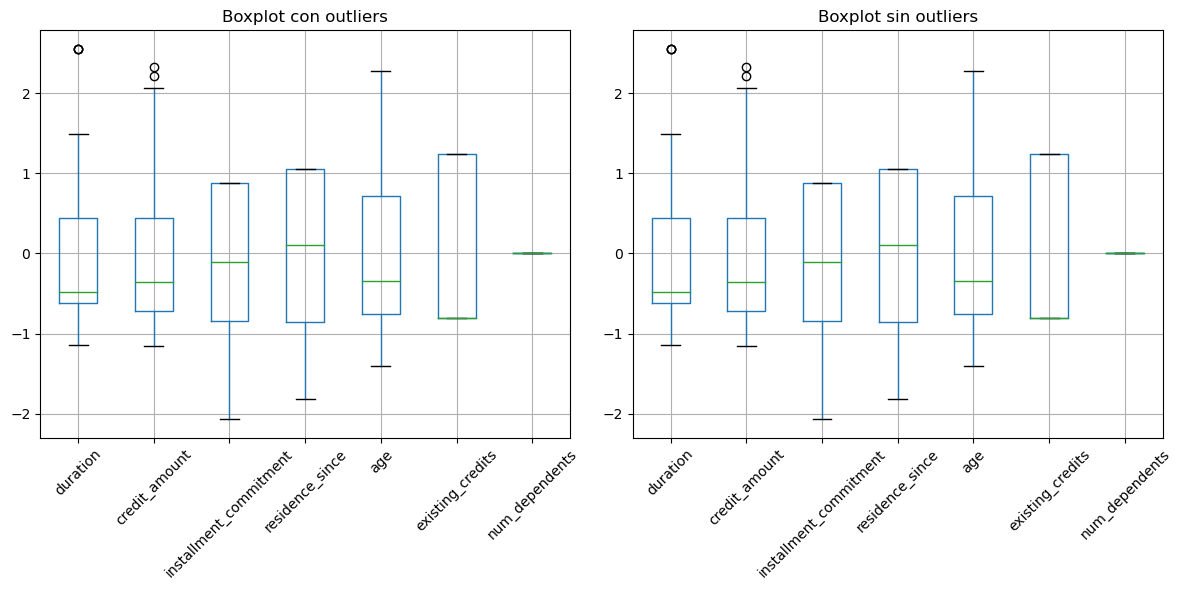

In [399]:
'''#13. De los gráficos Boxplot obtenidos quitar outliers por medio de Inter-quartil range'''

from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
df_num_norm = pd.DataFrame(scaler.fit_transform(df_num), columns=df_num.columns)

q1 = df_num_norm.quantile(0.25)
q3 = df_num_norm.quantile(0.75)
iqr = q3 - q1
upper = q3 + 1.5 * iqr
lower = q1 - 1.5 * iqr

for col in df_num_norm.columns:
    df_num_norm_no_outliers = df_num_norm[(df_num_norm[col] >= lower[col]) & (df_num_norm[col] <= upper[col])]


fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(12, 6))
df_num_norm.boxplot(ax=axs[0])
axs[0].set_title('Boxplot con outliers')
df_num_norm_no_outliers.boxplot(ax=axs[1])
axs[1].set_title('Boxplot sin outliers')
axs[0].set_xticklabels(df_num.columns, rotation=45)
axs[1].set_xticklabels(df_num.columns, rotation=45)
plt.tight_layout()
plt.show()


In [403]:
'''#14. Utilice One-hot encoding en campo purpose.'''

print(df['purpose'].info(),df['purpose'].unique(),sep='\n')

<class 'pandas.core.series.Series'>
RangeIndex: 50 entries, 0 to 49
Series name: purpose
Non-Null Count  Dtype 
--------------  ----- 
50 non-null     object
dtypes: object(1)
memory usage: 528.0+ bytes
None
['radio_tv' 'education' 'new_car' 'furniture_equipment' 'business'
 'used_car' 'other' 'repairs']


In [407]:
one_hot = pd.get_dummies(df['purpose'], prefix='purpose')
df = pd.concat([df, one_hot], axis=1)

In [410]:
print(df.iloc[:, -10:].head(5))

   purpose_repairs  purpose_used_car  purpose_business  purpose_education  \
0                0                 0                 0                  0   
1                0                 0                 0                  1   
2                0                 0                 0                  0   
3                0                 0                 0                  0   
4                0                 0                 0                  0   

   purpose_furniture_equipment  purpose_new_car  purpose_other  \
0                            0                0              0   
1                            0                0              0   
2                            0                0              0   
3                            0                0              0   
4                            0                1              0   

   purpose_radio_tv  purpose_repairs  purpose_used_car  
0                 1                0                 0  
1                 0       

In [424]:
'''#15. Obtenga las instancias que cumplan la condición de un monto de crédito mayor a 3000'''

df_creditos_mayores_3000 = df[df['credit_amount'] > 3000]
print(df_creditos_mayores_3000[['credit_amount']].head(5))


    credit_amount
0            3430
1            6110
5            3499
9            5117
10          10623


In [422]:
'''#16. Obtenga las instancias que cumplen con la condición de que job sea igual a “skilled” y que el monto de crédito sea mayor a 2000.'''

df_resultado = df.loc[(df['job'] == 'skilled') & (df['credit_amount'] > 2000)]
print(df_resultado[['job', 'credit_amount']].nunique(),df_resultado[['job', 'credit_amount']].head(5), sep='\n')


job               1
credit_amount    15
dtype: int64
        job  credit_amount
0   skilled           3430
1   skilled           6110
5   skilled           3499
9   skilled           5117
12  skilled           4605


In [434]:
'''#17. Obtenga suma total del camp credit_amount agrupado por el campo purpose “new car”.'''

df_sum_credit_amount_by_new_car = df.groupby('purpose')['credit_amount'].sum()
new_car_total = df_sum_credit_amount_by_new_car['new_car']
print("La suma total del campo credit_amount para el propósito 'new car' es:", new_car_total, "con un total de", df['purpose'].value_counts()['new_car'], "registros.")

La suma total del campo credit_amount para el propósito 'new car' es: 22752 con un total de 10 registros.


In [439]:
new_car_instances = df[df['purpose'] == 'new_car']
print(new_car_instances[['purpose', 'credit_amount']],'\n','El total final es: ',new_car_instances['credit_amount'].sum())

    purpose  credit_amount
4   new_car           1469
5   new_car           3499
8   new_car           1168
16  new_car           1028
22  new_car           1842
25  new_car           2255
26  new_car           1361
29  new_car           2799
40  new_car            717
44  new_car           6614 
 El total final es:  22752


In [441]:
'''#18. Obtenga age y class para los registros que tienen campo purpose “education” y housing “for_free”.'''

if 'education' in df['purpose'].unique() and 'for_free' in df['housing'].unique():
    df_resultado = df.loc[(df['purpose'] == 'education') & (df['housing'] == 'for_free')]
    print(df_resultado[['age', 'class','purpose','housing']].head(5))


    age class    purpose   housing
1    31  good  education  for_free
32   50  good  education  for_free
47   42   bad  education  for_free


In [442]:
'''#19. Obtenga el total y el promedio de credit amount agrupado por housing y class.'''

if 'housing' in df.columns and 'class' in df.columns:
    df_resultado = df.groupby(['housing', 'class'])['credit_amount'].agg(['sum', 'mean'])
    print(df_resultado)

                  sum         mean
housing  class                    
for_free bad    10893  5446.500000
         good   32168  6433.600000
own      bad    29795  4965.833333
         good   68789  2292.966667
rent     bad     9930  3310.000000
         good    6271  1567.750000
